















## Import danych

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from bokeh.models import ColumnDataSource

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_df_pm10 = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Weather_PM10_Prepared.csv')

<ipython-input-7-7619a0f675ed>:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_df_pm10 = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Weather_PM10_Prepared.csv')


In [ ]:
df_df_pm10['Location'].unique()

array(['MzWarszKrucza', 'MzWarszAKrzywon', 'MzWarszBernWoda',
       'MzWarszSGGW', 'MzWarszZelazWSSE', 'MzWarZeganWSSE',
       'MzWarszBorKomWSSE', 'MzWarszBielany', 'MzWarAKrzywo',
       'MzWarAlNiepo', 'MzWarTolstoj', 'MzWarBajkowa', 'MzWarChrosci'],
      dtype=object)

In [ ]:
print(df_df_pm10.columns)

Index(['Data', 'Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]', 'Suma dobowa opadów [mm]',
       'Rodzaj opadu  [S/W/ ]', 'Wysokość pokrywy śnieżnej [cm]',
       'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]', 'Location', 'PM10', 'PM10+24'],
      dtype='object')


In [ ]:
display(df_df_pm10.loc[df_df_pm10['Location'] == 'MzWarszKrucza'].notna())

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False
7666,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False
7667,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False
7668,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False


In [ ]:
filtered_df = df_df_pm10.loc[df_df_pm10['Location'] == 'MzWarszKrucza']

# Usuń wiersze zawierające jakiekolwiek wartości NaN
filtered_df = filtered_df.dropna()

In [ ]:
pd.set_option('display.max_columns', None)
display(filtered_df)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
1,2001-01-02,1.6,-5.2,-11.1,1.4,S,2,-1.2,0.0,1.7,2.3,995.5,0.8,MzWarszKrucza,50.2,68.8
2,2001-01-03,2.0,0.7,0.3,2.0,W,1,1.3,0.0,1.0,2.7,998.8,0.0,MzWarszKrucza,68.8,44.0
7,2001-01-08,4.9,2.4,0.3,3.1,W,0,3.4,0.0,1.7,4.7,998.0,0.0,MzWarszKrucza,40.3,52.1
8,2001-01-09,3.0,-0.4,-0.4,0.3,W,0,1.1,0.0,1.0,4.0,1001.4,0.4,MzWarszKrucza,52.1,41.5
9,2001-01-10,3.5,1.1,0.3,0.6,W,0,2.3,0.0,1.0,5.7,1017.3,0.0,MzWarszKrucza,41.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,0.0,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,0.0,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,0.0,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,0.0,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4


In [ ]:
df_df_pm10 = df_df_pm10.loc[df_df_pm10['Location'] == 'MzWarszKrucza']

In [ ]:
tmp = df_df_pm10.dropna()

tmp.describe()

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm]
count,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000
mean,13.674731,5.204494,2.468165,1.652530,2.220398,9.062863,35.718837,1.579602,3.659715,1002.933800,0.825888
std,10.110353,7.956847,8.169431,3.915134,6.533988,8.861135,37.342063,1.675318,2.579484,8.807588,2.846978
min,-17.500000,-27.000000,-32.700000,0.000000,0.000000,-22.500000,0.000000,0.000000,0.000000,969.800000,0.000000
25%,5.200000,-0.200000,-2.400000,0.000000,0.000000,2.200000,0.000000,0.000000,1.300000,997.500000,0.000000
50%,14.000000,5.400000,2.500000,0.000000,0.000000,9.200000,0.000000,1.300000,3.700000,1003.100000,0.000000
75%,22.200000,11.500000,8.800000,1.500000,0.000000,16.500000,72.000000,2.700000,5.700000,1008.300000,0.200000
max,36.900000,21.700000,20.000000,51.800000,52.000000,28.900000,100.000000,15.300000,8.000000,1031.300000,75.200000


In [ ]:
df_df_pm10.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]      21
Suma opadu dzień  [mm]                                 21
Location                                                0
PM10                                                 3860
PM10+24                                              3859
dtype: int64

In [ ]:
tmp.describe()

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm]
count,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000
mean,13.674731,5.204494,2.468165,1.652530,2.220398,9.062863,35.718837,1.579602,3.659715,1002.933800,0.825888
std,10.110353,7.956847,8.169431,3.915134,6.533988,8.861135,37.342063,1.675318,2.579484,8.807588,2.846978
min,-17.500000,-27.000000,-32.700000,0.000000,0.000000,-22.500000,0.000000,0.000000,0.000000,969.800000,0.000000
25%,5.200000,-0.200000,-2.400000,0.000000,0.000000,2.200000,0.000000,0.000000,1.300000,997.500000,0.000000
50%,14.000000,5.400000,2.500000,0.000000,0.000000,9.200000,0.000000,1.300000,3.700000,1003.100000,0.000000
75%,22.200000,11.500000,8.800000,1.500000,0.000000,16.500000,72.000000,2.700000,5.700000,1008.300000,0.200000
max,36.900000,21.700000,20.000000,51.800000,52.000000,28.900000,100.000000,15.300000,8.000000,1031.300000,75.200000


In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
0,2001-01-01,0.3,-3.1,-3.7,0.0,N,2,-1.9,0.0,1.3,1.3,995.7,0.8,MzWarszKrucza,NaN,50.2
1,2001-01-02,1.6,-5.2,-11.1,1.4,S,2,-1.2,0.0,1.7,2.3,995.5,0.8,MzWarszKrucza,50.2,68.8
2,2001-01-03,2.0,0.7,0.3,2.0,W,1,1.3,0.0,1.0,2.7,998.8,0.0,MzWarszKrucza,68.8,44.0
3,2001-01-04,2.5,1.0,0.7,0.0,N,0,1.8,0.0,0.7,5.7,996.3,0.0,MzWarszKrucza,44.0,NaN
4,2001-01-05,2.5,0.0,-0.7,2.0,W,0,1.2,0.0,1.7,6.7,989.4,0.8,MzWarszKrucza,NaN,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2021-12-27,-4.9,-12.0,-16.6,0.0,N,8,-9.1,94.3,5.0,8.0,NaN,NaN,MzWarszKrucza,NaN,NaN
7666,2021-12-28,-3.1,-8.6,-12.3,0.0,N,7,-5.7,83.0,7.7,7.3,NaN,NaN,MzWarszKrucza,NaN,NaN
7667,2021-12-29,1.5,-3.5,-6.1,0.6,W,7,-1.8,79.3,6.3,5.3,NaN,NaN,MzWarszKrucza,NaN,NaN
7668,2021-12-30,4.7,-1.7,-1.7,1.2,W,7,2.2,82.5,2.0,3.3,NaN,NaN,MzWarszKrucza,NaN,NaN


In [ ]:
#sprawdzenie średnich i maksymalnych wartości, mediany. Inlude all, tj. dla wszystkich kolumn zbioru danych
df_df_pm10.describe(include = 'all')

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
count,7670,7670.000000,7670.000000,7670.000000,7670.000000,7670,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7649.000000,7649.000000,7670,3810.0,3811.0
unique,7292,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,619.0,620.0
top,2019-11-06,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MzWarszKrucza,11.0,11.0
freq,2,NaN,NaN,NaN,NaN,3803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7670,107.0,107.0
mean,NaN,14.175450,5.773012,3.404720,1.647927,NaN,1.460495,9.644941,38.728553,1.771291,4.304107,1003.047784,0.826213,NaN,NaN,NaN
std,NaN,9.992511,7.743658,7.953394,4.044736,NaN,5.062699,8.731848,39.154328,2.060815,2.669087,8.449602,2.780860,NaN,NaN,NaN
min,NaN,-17.500000,-27.000000,-32.700000,0.000000,NaN,0.000000,-22.500000,0.000000,0.000000,0.000000,966.200000,0.000000,NaN,NaN,NaN
25%,NaN,6.000000,0.400000,-1.600000,0.000000,NaN,0.000000,3.000000,0.000000,0.000000,2.000000,997.900000,0.000000,NaN,NaN,NaN
50%,NaN,14.500000,5.900000,3.450000,0.000000,NaN,0.000000,9.700000,48.000000,1.300000,4.300000,1003.100000,0.000000,NaN,NaN,NaN
75%,NaN,22.500000,12.000000,9.600000,1.300000,NaN,0.000000,16.900000,78.000000,2.700000,6.700000,1008.300000,0.200000,NaN,NaN,NaN


In [ ]:
df_df_pm10.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]      21
Suma opadu dzień  [mm]                                 21
Location                                                0
PM10                                                 3860
PM10+24                                              3859
dtype: int64

In [ ]:
pm = 'PM10'
pm24 = 'PM10+24'
pmcat = 'PM10cat'
pmcat24 = 'PM10+24cat'
outFile = ''

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
0,2001-01-01,0.3,-3.1,-3.7,0.0,N,2,-1.9,0.0,1.3,1.3,995.7,0.8,MzWarszKrucza,NaN,50.2
1,2001-01-02,1.6,-5.2,-11.1,1.4,S,2,-1.2,0.0,1.7,2.3,995.5,0.8,MzWarszKrucza,50.2,68.8
2,2001-01-03,2.0,0.7,0.3,2.0,W,1,1.3,0.0,1.0,2.7,998.8,0.0,MzWarszKrucza,68.8,44.0
3,2001-01-04,2.5,1.0,0.7,0.0,N,0,1.8,0.0,0.7,5.7,996.3,0.0,MzWarszKrucza,44.0,NaN
4,2001-01-05,2.5,0.0,-0.7,2.0,W,0,1.2,0.0,1.7,6.7,989.4,0.8,MzWarszKrucza,NaN,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2021-12-27,-4.9,-12.0,-16.6,0.0,N,8,-9.1,94.3,5.0,8.0,NaN,NaN,MzWarszKrucza,NaN,NaN
7666,2021-12-28,-3.1,-8.6,-12.3,0.0,N,7,-5.7,83.0,7.7,7.3,NaN,NaN,MzWarszKrucza,NaN,NaN
7667,2021-12-29,1.5,-3.5,-6.1,0.6,W,7,-1.8,79.3,6.3,5.3,NaN,NaN,MzWarszKrucza,NaN,NaN
7668,2021-12-30,4.7,-1.7,-1.7,1.2,W,7,2.2,82.5,2.0,3.3,NaN,NaN,MzWarszKrucza,NaN,NaN


In [ ]:
df_df_pm10.loc[(df_df_pm10['Data'] <= '2020-12-20')&(df_df_pm10['Data']>='201')]

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24
3287,2010-01-01,-2.5,-4.1,-4.3,3.2,S,5,-3.6,0.0,0.0,1.7,1012.6,0.3,MzWarszKrucza,28.0,25.0
3288,2010-01-02,-2.6,-3.7,-3.8,2.0,S,10,-3.4,0.0,0.0,0.0,975.9,0.4,MzWarszKrucza,25.0,22.0
3289,2010-01-03,-3.6,-11.8,-16.0,0.0,W,13,-8.6,0.0,0.0,0.0,989.8,0.0,MzWarszKrucza,22.0,61.0
3290,2010-01-04,-5.5,-14.9,-19.6,0.0,W,13,-9.1,0.0,0.0,4.0,993.0,0.0,MzWarszKrucza,61.0,83.0
3291,2010-01-05,-3.2,-9.4,-13.6,0.0,W,13,-6.0,0.0,0.0,5.3,997.7,0.1,MzWarszKrucza,83.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarszKrucza,NaN,NaN
7290,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarszKrucza,NaN,NaN
7291,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarszKrucza,NaN,NaN
7292,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarszKrucza,NaN,NaN


# Połączenie z innymi zanieczyszczeniami

## PM2.5

In [ ]:
df_df_pm25 = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Weather_PM2.5_Prepared.csv')

In [ ]:
df_df_pm10['Location'].unique()

array(['MzWarszKrucza'], dtype=object)

In [ ]:
df_df_pm10['PM2.5'] = np.nan

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5
0,2001-01-01,0.3,-3.1,-3.7,0.0,N,2,-1.9,0.0,1.3,1.3,995.7,0.8,MzWarszKrucza,NaN,50.2,NaN
1,2001-01-02,1.6,-5.2,-11.1,1.4,S,2,-1.2,0.0,1.7,2.3,995.5,0.8,MzWarszKrucza,50.2,68.8,NaN
2,2001-01-03,2.0,0.7,0.3,2.0,W,1,1.3,0.0,1.0,2.7,998.8,0.0,MzWarszKrucza,68.8,44.0,NaN
3,2001-01-04,2.5,1.0,0.7,0.0,N,0,1.8,0.0,0.7,5.7,996.3,0.0,MzWarszKrucza,44.0,NaN,NaN
4,2001-01-05,2.5,0.0,-0.7,2.0,W,0,1.2,0.0,1.7,6.7,989.4,0.8,MzWarszKrucza,NaN,41.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2021-12-27,-4.9,-12.0,-16.6,0.0,N,8,-9.1,94.3,5.0,8.0,NaN,NaN,MzWarszKrucza,NaN,NaN,NaN
7666,2021-12-28,-3.1,-8.6,-12.3,0.0,N,7,-5.7,83.0,7.7,7.3,NaN,NaN,MzWarszKrucza,NaN,NaN,NaN
7667,2021-12-29,1.5,-3.5,-6.1,0.6,W,7,-1.8,79.3,6.3,5.3,NaN,NaN,MzWarszKrucza,NaN,NaN,NaN
7668,2021-12-30,4.7,-1.7,-1.7,1.2,W,7,2.2,82.5,2.0,3.3,NaN,NaN,MzWarszKrucza,NaN,NaN,NaN


In [ ]:
df_df_pm25.isna().sum()

Data                                                     0
Maksymalna temperatura dobowa [°C]                       0
Minimalna temperatura dobowa [°C]                        0
Temperatura minimalna przy gruncie [°C]                  0
Suma dobowa opadów [mm]                                  0
Rodzaj opadu  [S/W/ ]                                    0
Wysokość pokrywy śnieżnej [cm]                           0
Średnia temperatura dobowa [°C]                          0
Średnia dobowa wilgotność względna [%]                   0
Średnia dobowa prędkość wiatru [m/s]                     0
Średnie dobowe zachmurzenie ogólne [oktanty]             0
Średnia dobowe ciśnienie na poziomie stacji [hPa]      147
Suma opadu dzień  [mm]                                 147
Location                                                 0
PM2.5                                                44466
PM2.5+24                                             44459
dtype: int64

In [ ]:
df_df_pm25['Location'].unique()

array(['MzWarszUrsynow', 'MzWarszSGGW', 'MzWarTarKondra', 'MzWarKondrat',
       'MzWarWokalna', 'MzWarTolstoj', 'MzWarNiepodKom'], dtype=object)

In [ ]:
filtered_df_pm25_1 = df_df_pm25.loc[df_df_pm25['Location'] == 'MzWarWokalna']

In [ ]:
filtered_df_pm25 = df_df_pm25.loc[df_df_pm25['Location'] == 'MzWarszUrsynow']

In [ ]:
filtered_df_pm25.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]      21
Suma opadu dzień  [mm]                                 21
Location                                                0
PM2.5                                                5542
PM2.5+24                                             5541
dtype: int64

In [ ]:
merged_df_pm25 = pd.concat([filtered_df_pm25, filtered_df_pm25_1], ignore_index=True)

In [ ]:
display(merged_df_pm25)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM2.5,PM2.5+24
0,2001-01-01,0.3,-3.1,-3.7,0.0,N,2,-1.9,0.0,1.3,1.3,995.7,0.8,MzWarszUrsynow,NaN,NaN
1,2001-01-02,1.6,-5.2,-11.1,1.4,S,2,-1.2,0.0,1.7,2.3,995.5,0.8,MzWarszUrsynow,NaN,NaN
2,2001-01-03,2.0,0.7,0.3,2.0,W,1,1.3,0.0,1.0,2.7,998.8,0.0,MzWarszUrsynow,NaN,NaN
3,2001-01-04,2.5,1.0,0.7,0.0,N,0,1.8,0.0,0.7,5.7,996.3,0.0,MzWarszUrsynow,NaN,NaN
4,2001-01-05,2.5,0.0,-0.7,2.0,W,0,1.2,0.0,1.7,6.7,989.4,0.8,MzWarszUrsynow,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,2021-12-27,-4.9,-12.0,-16.6,0.0,N,8,-9.1,94.3,5.0,8.0,NaN,NaN,MzWarWokalna,NaN,NaN
15336,2021-12-28,-3.1,-8.6,-12.3,0.0,N,7,-5.7,83.0,7.7,7.3,NaN,NaN,MzWarWokalna,NaN,NaN
15337,2021-12-29,1.5,-3.5,-6.1,0.6,W,7,-1.8,79.3,6.3,5.3,NaN,NaN,MzWarWokalna,NaN,NaN
15338,2021-12-30,4.7,-1.7,-1.7,1.2,W,7,2.2,82.5,2.0,3.3,NaN,NaN,MzWarWokalna,NaN,NaN


In [ ]:
mergerd_df = merged_df_pm25[(merged_df_pm25['Data'] >= '2008-01-02') & (merged_df_pm25['Data'] <= '2021-12-20')]

In [ ]:
mergerd_df = mergerd_df.drop_duplicates().dropna()

In [ ]:
display(mergerd_df)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM2.5,PM2.5+24
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszUrsynow,80.5,50.4
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszUrsynow,50.4,41.3
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszUrsynow,41.3,20.3
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszUrsynow,20.3,11.2
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszUrsynow,11.2,29.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,2020-12-14,2.4,0.6,1.2,0.0,N,0,1.4,0.0,0.0,6.0,1003.9,0.0,MzWarWokalna,30.655,14.552
14958,2020-12-15,2.7,-0.2,0.7,0.0,N,0,1.3,0.0,0.0,4.3,999.0,7.2,MzWarWokalna,14.552,7.476
14959,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarWokalna,7.476,12.437
14960,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarWokalna,12.437,4.055


In [ ]:
mergerd_df = pd.concat([mergerd_df, merged_df_pm25.dropna().reset_index(drop=True)], ignore_index=True)

In [ ]:
filtered_pm10 = df_df_pm10[(df_df_pm10['Data'] >= '2008-01-02') & (df_df_pm10['Data'] <= '2020-12-20')]

In [ ]:
display(filtered_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,NaN
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,NaN
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,NaN
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,NaN
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarszKrucza,NaN,NaN,NaN
7290,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarszKrucza,NaN,NaN,NaN
7291,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarszKrucza,NaN,NaN,NaN
7292,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarszKrucza,NaN,NaN,NaN


In [ ]:
filtered_pm10.loc[filtered_pm10['Data'] == '2008-01-04', 'PM2.5'] = mergerd_df.loc[mergerd_df['Data'] == '2008-01-04', 'PM2.5'].values[0]

In [ ]:
values = mergerd_df['Data'].values

for date in values:


    # Sprawdzenie, czy istnieje wiersz dla danej daty w drugim DataFrame'ie
    if not mergerd_df[mergerd_df['Data'] == date].empty:
        # Przypisanie wartości PM2.5 z drugiego zbioru do pierwszego na podstawie dat
        filtered_pm10.loc[filtered_pm10['Data'] == date, 'PM2.5'] = mergerd_df.loc[mergerd_df['Data'] == date, 'PM2.5'].values[0]

In [ ]:
df_pm10 = filtered_pm10.dropna()

In [ ]:
filtered_pm10.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]       0
Suma opadu dzień  [mm]                                  0
Location                                                0
PM10                                                 3311
PM10+24                                              3312
PM2.5                                                 156
dtype: int64

In [ ]:
display(df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,0.0,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,0.0,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,0.0,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,0.0,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638


In [ ]:
df_df_pm10 = df_pm10

## O3

In [ ]:
df_df_no2 = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Weather_O3_Prepared.csv')

<ipython-input-46-aa75581dd208>:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_df_no2 = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Weather_O3_Prepared.csv')


In [ ]:
df_df_pm10['Location'].unique()

array(['MzWarszKrucza'], dtype=object)

In [ ]:
df_df_pm10['NO2'] = np.nan

<ipython-input-48-c3dc5688e3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['NO2'] = np.nan


In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,NO2
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5,NaN
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4,NaN
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3,NaN
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3,NaN
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,0.0,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025,NaN
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,0.0,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354,NaN
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,0.0,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242,NaN
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,0.0,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638,NaN


In [ ]:
df_df_no2['Location'].unique()

array(['MzWarPodIMGW', 'MzWarszKrucza', 'MzWarszUrsynow',
       'MzWarszBielany', 'MzWarTarKondra', 'MzWarKondrat', 'MzWarPodlesn',
       'MzWarWokalna', 'MzWarChrosci', 'MzWarMeteo'], dtype=object)

In [ ]:
df_df_no2[(df_df_no2['Location'] == 'MzWarKondrat')&(df_df_no2['Data'] >= '2015-01-01')&(df_df_no2['Data']<='2020-12-20')]

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,O3,O3+24
43463,2015-01-01,3.0,-1.6,-1.8,0.0,N,0,1.5,0.0,0.0,0.0,989.0,0.0,MzWarKondrat,30.5,46.0
43464,2015-01-02,5.6,1.0,0.2,2.6,W,0,3.8,0.0,0.0,6.0,997.5,0.0,MzWarKondrat,46,41.6
43465,2015-01-03,5.6,1.1,0.9,1.8,S,0,3.0,0.0,0.0,8.0,1009.9,0.1,MzWarKondrat,41.6,54.4
43466,2015-01-04,3.5,0.9,0.7,0.0,N,0,2.4,0.0,0.0,7.7,1015.5,0.0,MzWarKondrat,54.4,46.7
43467,2015-01-05,3.0,-1.4,-2.2,1.1,S,0,0.3,0.0,0.0,8.0,1004.9,0.0,MzWarKondrat,46.7,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45639,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarKondrat,5.75,29.95
45640,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarKondrat,29.95,5.85
45641,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarKondrat,5.85,27.25
45642,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarKondrat,27.25,40.95


In [ ]:
filtered_df_no2_1 = df_df_no2.loc[(df_df_no2['Location'] == 'MzWarPodIMGW')&(df_df_no2['Data'] >= '2008-01-02')&(df_df_no2['Data'] <= '2014-12-31')]

In [ ]:
filtered_df_no2 = df_df_no2.loc[(df_df_no2['Location'] == 'MzWarKondrat')&(df_df_no2['Data']>='2014-12-31')&(df_df_no2['Data']<='2020-12-20')]

In [ ]:
filtered_df_pm25.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]      21
Suma opadu dzień  [mm]                                 21
Location                                                0
PM2.5                                                5542
PM2.5+24                                             5541
dtype: int64

In [ ]:
merged_df_no2 = pd.DataFrame()

In [ ]:
merged_df_no2 = pd.concat([filtered_df_no2, filtered_df_no2_1], ignore_index=True)

In [ ]:
display(merged_df_no2.sort_values(by='Data'))

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,O3,O3+24
2182,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarPodIMGW,25.0,47.0
2183,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarPodIMGW,47.0,48.0
2184,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarPodIMGW,48.0,45.0
2185,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarPodIMGW,45.0,4.0
2186,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarPodIMGW,4.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarKondrat,5.75,29.95
2178,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarKondrat,29.95,5.85
2179,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarKondrat,5.85,27.25
2180,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarKondrat,27.25,40.95


In [ ]:
mergerd_df = merged_df_no2[(merged_df_no2['Data'] >= '2008-01-02') & (merged_df_no2['Data'] <= '2020-12-20')]

In [ ]:
mergerd_df = mergerd_df.drop_duplicates().dropna()

In [ ]:
display(mergerd_df.sort_values(by='Data'))

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,O3,O3+24
2182,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarPodIMGW,25.0,47.0
2183,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarPodIMGW,47.0,48.0
2184,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarPodIMGW,48.0,45.0
2185,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarPodIMGW,45.0,4.0
2186,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarPodIMGW,4.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarKondrat,5.75,29.95
2178,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarKondrat,29.95,5.85
2179,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarKondrat,5.85,27.25
2180,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarKondrat,27.25,40.95


In [ ]:
mergerd_df = pd.concat([mergerd_df, merged_df_no2.dropna().reset_index(drop=True)], ignore_index=True)

In [ ]:
filtered_no2 = df_df_no2[(df_df_no2['Data'] >= '2008-01-02') & (df_df_no2['Data'] <= '2020-12-20')]

In [ ]:
display(filtered_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-12-16,4.9,1.6,1.9,0.0,W,0,3.3,0.0,0.0,7.7,998.7,0.0,MzWarszKrucza,NaN,NaN,7.476
7290,2020-12-17,5.7,4.0,4.4,0.1,W,0,4.9,0.0,0.0,1.0,996.8,0.0,MzWarszKrucza,NaN,NaN,12.437
7291,2020-12-18,6.5,2.8,3.4,0.0,N,0,4.6,0.0,0.0,8.0,1000.0,0.0,MzWarszKrucza,NaN,NaN,NaN
7292,2020-12-19,6.3,-0.4,-2.0,0.0,W,0,1.8,0.0,0.0,2.0,1003.9,0.5,MzWarszKrucza,NaN,NaN,NaN


In [ ]:
values = mergerd_df['Data'].values

for date in values:


    # Sprawdzenie, czy istnieje wiersz dla danej daty w drugim DataFrame'ie
    if not mergerd_df[mergerd_df['Data'] == date].empty:
        # Przypisanie wartości PM2.5 z drugiego zbioru do pierwszego na podstawie dat
        filtered_pm10.loc[filtered_pm10['Data'] == date, 'O3'] = mergerd_df.loc[mergerd_df['Data'] == date, 'O3'].values[0]

In [ ]:
df_pm10 = filtered_pm10.dropna()

In [ ]:
filtered_pm10.isna().sum()

Data                                                    0
Maksymalna temperatura dobowa [°C]                      0
Minimalna temperatura dobowa [°C]                       0
Temperatura minimalna przy gruncie [°C]                 0
Suma dobowa opadów [mm]                                 0
Rodzaj opadu  [S/W/ ]                                   0
Wysokość pokrywy śnieżnej [cm]                          0
Średnia temperatura dobowa [°C]                         0
Średnia dobowa wilgotność względna [%]                  0
Średnia dobowa prędkość wiatru [m/s]                    0
Średnie dobowe zachmurzenie ogólne [oktanty]            0
Średnia dobowe ciśnienie na poziomie stacji [hPa]       0
Suma opadu dzień  [mm]                                  0
Location                                                0
PM10                                                 3311
PM10+24                                              3312
PM2.5                                                 156
O3            

In [ ]:
display(df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,0.0,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,0.0,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,0.0,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,0.0,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638,28.6


In [ ]:
df_df_pm10 = df_pm10

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,67.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,72.0,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,84.3,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,71.0,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,75.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,0.0,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,0.0,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,0.0,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,0.0,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638,28.6


## Dodatkowe pogodowe dane

In [ ]:
wilgotnosc_para = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Gotowe_sd.csv')

In [ ]:
display(wilgotnosc_para.loc[wilgotnosc_para['Data']<='2020-12-17'])

,level_0,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia temperatura dobowa [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Średnie dobowe ciśnienie na pozimie morza [hPa],Suma opadu dzień [mm],Suma opadu noc [mm],Data
0,0,7.1,3.4,-2.1,4.7,88.4,995.7,1009.2,0.8,3.0,2001-01-02
1,1,7.9,2.1,0.6,6.0,94.9,995.5,1008.8,0.8,1.4,2001-01-03
2,2,8.0,3.0,1.6,6.8,99.0,998.8,1012.1,0.0,0.0,2001-01-04
3,3,7.4,3.5,0.4,6.2,98.4,996.3,1009.6,0.0,2.0,2001-01-05
4,4,7.1,4.3,4.5,7.7,91.8,989.4,1002.4,0.8,0.0,2001-01-06
...,...,...,...,...,...,...,...,...,...,...,...
7266,7266,8.0,2.1,1.1,6.2,94.6,1000.6,1013.9,0.0,0.0,2020-12-13
7267,7267,7.6,2.0,0.9,5.9,91.1,1006.5,1019.9,0.0,0.0,2020-12-14
7268,7268,7.8,3.6,0.9,6.1,93.6,1007.2,1020.7,0.0,0.0,2020-12-15
7269,7269,7.6,2.0,3.2,7.2,93.1,1008.7,1022.1,0.0,0.0,2020-12-16


In [ ]:
checkpoint = df_df_pm10

In [ ]:
df_df_pm10 = checkpoint

In [ ]:
values = df_df_pm10['Data'].values

for date in values:


    # Sprawdzenie, czy istnieje wiersz dla danej daty w drugim DataFrame'ie
    if not wilgotnosc_para[wilgotnosc_para['Data'] == date].empty:
        # Przypisanie wartości PM2.5 z drugiego zbioru do pierwszego na podstawie dat
        df_df_pm10.loc[df_df_pm10['Data'] == date, 'Średnia dobowa wilgotność względna [%]'] = wilgotnosc_para.loc[wilgotnosc_para['Data'] == date, 'Średnia dobowa wilgotność względna [%]'].values[0]

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,85.0,3.7,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,79.3,1.3,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,74.5,2.7,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,67.5,3.3,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,90.5,3.0,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,94.5,1.3,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,92.6,1.0,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,89.9,1.7,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,80.8,1.7,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638,28.6


In [ ]:
print(wilgotnosc_para.columns)


Index(['level_0', 'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowa prędkość wiatru [m/s] ',
       'Średnia temperatura dobowa [°C]',
       'Średnia dobowe ciśnienie pary wodnej [hPa]',
       'Średnia dobowa wilgotność względna [%]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Średnie dobowe ciśnienie na pozimie morza [hPa]',
       'Suma opadu dzień  [mm]', 'Suma opadu noc   [mm]', 'Data'],
      dtype='object')


In [ ]:

values = df_df_pm10['Data'].values

for date in values:
    # Sprawdzenie, czy istnieje wiersz dla danej daty w drugim DataFrame'ie
    if not wilgotnosc_para[wilgotnosc_para['Data'] == date].empty:


        # Przypisanie wartości PM2.5 z drugiego zbioru do pierwszego na podstawie dat
        df_df_pm10.loc[df_df_pm10['Data'] == date, 'Średnia dobowa prędkość wiatru [m/s]'] = wilgotnosc_para.loc[wilgotnosc_para['Data'] == date, 'Średnia dobowa prędkość wiatru [m/s] '].values[0]

In [ ]:

values = df_df_pm10['Data'].values

for date in values:
    # Sprawdzenie, czy istnieje wiersz dla danej daty w drugim DataFrame'ie
    if not wilgotnosc_para[wilgotnosc_para['Data'] == date].empty:


        # Przypisanie wartości PM2.5 z drugiego zbioru do pierwszego na podstawie dat
        df_df_pm10.loc[df_df_pm10['Data'] == date, 'Średnia dobowa prędkość wiatru [m/s]'] = wilgotnosc_para.loc[wilgotnosc_para['Data'] == date, 'Średnia dobowa prędkość wiatru [m/s] '].values[0]

# Konwersja typu danych

In [ ]:
#konieczne konwersje typów danych
import re

patern = r'.*,.*'

for index,row in df_df_pm10.iterrows():
  if re.search(patern, str(row[pm])):
    df_df_pm10.loc[index,pm] = df_df_pm10.loc[index,pm].replace(',','.')

df_df_pm10[pm] = df_df_pm10[pm].astype(float)

<ipython-input-79-4e9dab96864c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10[pm] = df_df_pm10[pm].astype(float)


In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,85.0,5.3,1.3,1006.7,0.0,MzWarszKrucza,28.1,31.4,80.5,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,79.3,7.0,5.7,1003.3,1.2,MzWarszKrucza,31.4,27.7,50.4,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,74.5,9.9,7.3,1008.3,0.0,MzWarszKrucza,27.7,31.4,41.3,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,67.5,8.8,0.7,1004.0,0.0,MzWarszKrucza,31.4,31.7,20.3,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,90.5,5.9,5.7,992.9,0.4,MzWarszKrucza,31.7,49.1,11.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,94.5,5.1,1.3,996.5,0.0,MzWarszKrucza,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,92.6,5.8,4.3,995.7,0.6,MzWarszKrucza,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,89.9,2.4,3.0,1005.1,0.0,MzWarszKrucza,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,80.8,3.3,4.7,1008.6,0.0,MzWarszKrucza,23.0,26.4,43.638,28.6


In [ ]:
#konieczne konwersje typów danych
import re

patern = r'.*,.*'

for index,row in df_df_pm10.iterrows():
  if re.search(patern, str(row[pm24])):
    df_df_pm10.loc[index,pm24] = df_df_pm10.loc[index,pm24].replace(',','.')

df_df_pm10[pm24] = df_df_pm10[pm24].astype(float)

<ipython-input-81-39cdb190b442>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10[pm24] = df_df_pm10[pm24].astype(float)


In [ ]:
from numpy.core import numerictypes
#zamiana wartości typy string, które określaja nazwę stacji, na wartość numeryczną 1,2,3...(w zależności ile jest stacji w danym zbiorze danych)
numer=0;
poprzedni = '';
for index, row in df_df_pm10.iterrows():
  temp = df_df_pm10.loc[index,'Location']
  if(poprzedni!=temp):
    numer+=1
  df_df_pm10.loc[index,'Location'] = numer
  poprzedni = temp

df_df_pm10['Location'] = df_df_pm10['Location'].astype(int)


<ipython-input-82-b8540a0eb5b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['Location'] = df_df_pm10['Location'].astype(int)



# Konwersja kolumn dodatkowych zanieczyszczeń



In [ ]:
#konieczne konwersje typów danych
import re

patern = r'.*,.*'

for index,row in df_df_pm10.iterrows():
  if re.search(patern, str(row['PM2.5'])):
    df_df_pm10.loc[index,'PM2.5'] = df_df_pm10.loc[index,'PM2.5'].replace(',','.')

df_df_pm10['PM2.5'] = df_df_pm10['PM2.5'].astype(float)

<ipython-input-83-3f0e60b42c43>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['PM2.5'] = df_df_pm10['PM2.5'].astype(float)


In [ ]:
display(df_df_pm10.loc[(df_df_pm10['Średnia dobowa wilgotność względna [%]'] < 35.0)&(df_df_pm10['Średnia dobowa wilgotność względna [%]'] > 10.0)])

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
3043,2009-05-02,21.5,4.9,0.0,0.0,N,0,13.4,33.5,3.5,5.3,1006.7,4.4,1,27.4,31.1,23.9,0.8


In [ ]:
#konieczne konwersje typów danych
import re

patern = r'.*,.*'

for index,row in df_df_pm10.iterrows():
  if re.search(patern, str(row['O3'])):
    df_df_pm10.loc[index,'O3'] = df_df_pm10.loc[index,'O3'].replace(',','.')

df_df_pm10['O3'] = df_df_pm10['O3'].astype(float)

<ipython-input-85-4721551d914e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['O3'] = df_df_pm10['O3'].astype(float)


In [ ]:
display(df_df_pm10.loc[df_df_pm10['Location']==1])

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6


# Wybranie cech i utworzenie nowych cech

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3
2557,2008-01-02,0.7,-4.4,-8.1,0.0,N,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,N,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,N,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,N,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,S,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,W,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7
4012,2011-12-27,8.9,8.1,7.1,0.4,W,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0
4013,2011-12-28,8.4,1.5,-1.6,0.0,N,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9
4014,2011-12-29,6.8,3.7,3.5,0.0,N,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6


In [ ]:
#utworzenie kolumny "Dzień Roku" na podstawie Daty (1-365/366)
df_df_pm10['Dzień Roku'] = 0
day= 0
poprzedniaLokalizacja = 1
poprzedniaData = '2001'

for index,row in df_df_pm10.iterrows():
  tempLoc = df_df_pm10.loc[index,'Location']
  tempData = df_df_pm10.loc[index,'Data'].split("-")

  if((poprzedniaLokalizacja==tempLoc)&(poprzedniaData==tempData[0])):
    day+=1
    df_df_pm10.loc[index,'Dzień Roku'] = day
  else:
    day=1
    df_df_pm10.loc[index,'Dzień Roku'] = day

  poprzedniaLokalizacja = tempLoc
  poprzedniaData = tempData[0]


<ipython-input-88-3c2efb61b3fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['Dzień Roku'] = 0


In [ ]:
#utworzenie kolumny "Dzien Tygodnia"
df_df_pm10['Dzień Tygodnia'] = 0
day= 0
for index,row in df_df_pm10.iterrows():
  if(day<7):
    day+=1
  else:
    day=1
  df_df_pm10.loc[index,'Dzień Tygodnia'] = day

<ipython-input-89-aeaadd809a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['Dzień Tygodnia'] = 0


In [ ]:
#zmiana kategorycznych zmiennych na zmienne numeryczne
for index, row in df_df_pm10.iterrows():
  if(df_df_pm10.loc[index,'Rodzaj opadu  [S/W/ ]']=='S'):
    df_df_pm10.loc[index,'Rodzaj opadu  [S/W/ ]'] = 2
  elif(df_df_pm10.loc[index,'Rodzaj opadu  [S/W/ ]']=='W'):
    df_df_pm10.loc[index,'Rodzaj opadu  [S/W/ ]'] = 1
  else:
    df_df_pm10.loc[index,'Rodzaj opadu  [S/W/ ]'] =0

In [ ]:
#utworzenie zmiennej "Róznica pomiędzy minimalną a maksymalną temperaturą"
df_df_pm10['Róznica Maksymalnej i Minimalnej temperatury [°C]'] = 0
for index,row in df_df_pm10.iterrows():
  df_df_pm10.loc[index,'Róznica Maksymalnej i Minimalnej temperatury [°C]'] = df_df_pm10.loc[index,'Maksymalna temperatura dobowa [°C]'] - df_df_pm10.loc[index,'Minimalna temperatura dobowa [°C]']

<ipython-input-91-76a7d5de7c69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['Róznica Maksymalnej i Minimalnej temperatury [°C]'] = 0


In [ ]:
#estymacja wilgotności, której czujnik nie złapał na podstawie równania tetensa
for index,row in df_df_pm10.iterrows():
  if(df_df_pm10.loc[index,'Średnia dobowa wilgotność względna [%]']==0.0):

    df_df_pm10.loc[index,'Średnia dobowa wilgotność względna [%]'] = np.nan

In [ ]:
#estymacja temperatury punktu rosy na podstawie twierdzenia magnussona-tetensa
df_df_pm10['Temperatura punktu Rosy [°C]'] = 0
for index,row in df_df_pm10.iterrows():
  df_df_pm10.loc[index,'Temperatura punktu Rosy [°C]'] = (243.04 * (np.log(df_df_pm10.loc[index,'Średnia dobowa wilgotność względna [%]']  / 100) + (17.625 * df_df_pm10.loc[index,'Średnia temperatura dobowa [°C]']  / (243.04 + df_df_pm10.loc[index,'Średnia temperatura dobowa [°C]'])))) / (17.625 - np.log(df_df_pm10.loc[index,'Średnia dobowa wilgotność względna [%]'] / 100) - (17.625 * df_df_pm10.loc[index,'Średnia temperatura dobowa [°C]']/ (243.04 + df_df_pm10.loc[index,'Średnia temperatura dobowa [°C]'])))

<ipython-input-93-18e70b05f666>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_df_pm10['Temperatura punktu Rosy [°C]'] = 0


In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
2557,2008-01-02,0.7,-4.4,-8.1,0.0,0,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0,1,1,5.1,-5.264546
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,0,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0,2,2,6.5,-11.148565
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,0,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0,3,3,2.0,-11.542363
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,0,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0,4,4,5.6,-15.645621
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,2,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0,5,5,11.9,-5.521952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,1,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7,342,2,6.1,5.680341
4012,2011-12-27,8.9,8.1,7.1,0.4,1,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0,343,3,0.8,7.369501
4013,2011-12-28,8.4,1.5,-1.6,0.0,0,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9,344,4,6.9,3.085023
4014,2011-12-29,6.8,3.7,3.5,0.0,0,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6,345,5,3.1,1.877730


In [ ]:
df_df_pm10.isna().sum()

Data                                                 0
Maksymalna temperatura dobowa [°C]                   0
Minimalna temperatura dobowa [°C]                    0
Temperatura minimalna przy gruncie [°C]              0
Suma dobowa opadów [mm]                              0
Rodzaj opadu  [S/W/ ]                                0
Wysokość pokrywy śnieżnej [cm]                       0
Średnia temperatura dobowa [°C]                      0
Średnia dobowa wilgotność względna [%]               2
Średnia dobowa prędkość wiatru [m/s]                 0
Średnie dobowe zachmurzenie ogólne [oktanty]         0
Średnia dobowe ciśnienie na poziomie stacji [hPa]    0
Suma opadu dzień  [mm]                               0
Location                                             0
PM10                                                 0
PM10+24                                              0
PM2.5                                                0
O3                                                   0
Dzień Roku

In [ ]:
df_df_pm10 = df_df_pm10.dropna(subset=["Średnia dobowe ciśnienie na poziomie stacji [hPa]"])

In [ ]:
df_df_pm10 = df_df_pm10.dropna(subset=["Suma opadu dzień  [mm]"])

In [ ]:
df_df_pm10 = df_df_pm10.dropna(subset=[pm])

In [ ]:
df_df_pm10 = df_df_pm10.dropna(subset=[pm24])

In [ ]:
df_checkpoint = df_df_pm10

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
2557,2008-01-02,0.7,-4.4,-8.1,0.0,0,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0,1,1,5.1,-5.264546
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,0,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0,2,2,6.5,-11.148565
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,0,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0,3,3,2.0,-11.542363
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,0,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0,4,4,5.6,-15.645621
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,2,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0,5,5,11.9,-5.521952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,1,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7,342,2,6.1,5.680341
4012,2011-12-27,8.9,8.1,7.1,0.4,1,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0,343,3,0.8,7.369501
4013,2011-12-28,8.4,1.5,-1.6,0.0,0,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9,344,4,6.9,3.085023
4014,2011-12-29,6.8,3.7,3.5,0.0,0,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6,345,5,3.1,1.877730


# Wizualizacja wartości odstających (Standaryzacja)

In [ ]:
df_df_pm10

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
2557,2008-01-02,0.7,-4.4,-8.1,0.0,0,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0,1,1,5.1,-5.264546
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,0,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0,2,2,6.5,-11.148565
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,0,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0,3,3,2.0,-11.542363
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,0,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0,4,4,5.6,-15.645621
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,2,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0,5,5,11.9,-5.521952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,1,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7,342,2,6.1,5.680341
4012,2011-12-27,8.9,8.1,7.1,0.4,1,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0,343,3,0.8,7.369501
4013,2011-12-28,8.4,1.5,-1.6,0.0,0,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9,344,4,6.9,3.085023
4014,2011-12-29,6.8,3.7,3.5,0.0,0,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6,345,5,3.1,1.877730


In [ ]:
column_names = list(df_df_pm10.columns.values)

In [ ]:
textIndex = [[0,0],[25,15],[10,-25],[10,-30],[40,0],[0,0],[40,0],[20,-20],[80,0],[15,0],[6,0],[1020,970],[60,0],[0,0],[0,0],[0,0],[0,0],[0,0],[17.5,0]]

<ipython-input-105-44ffb4ae7338>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


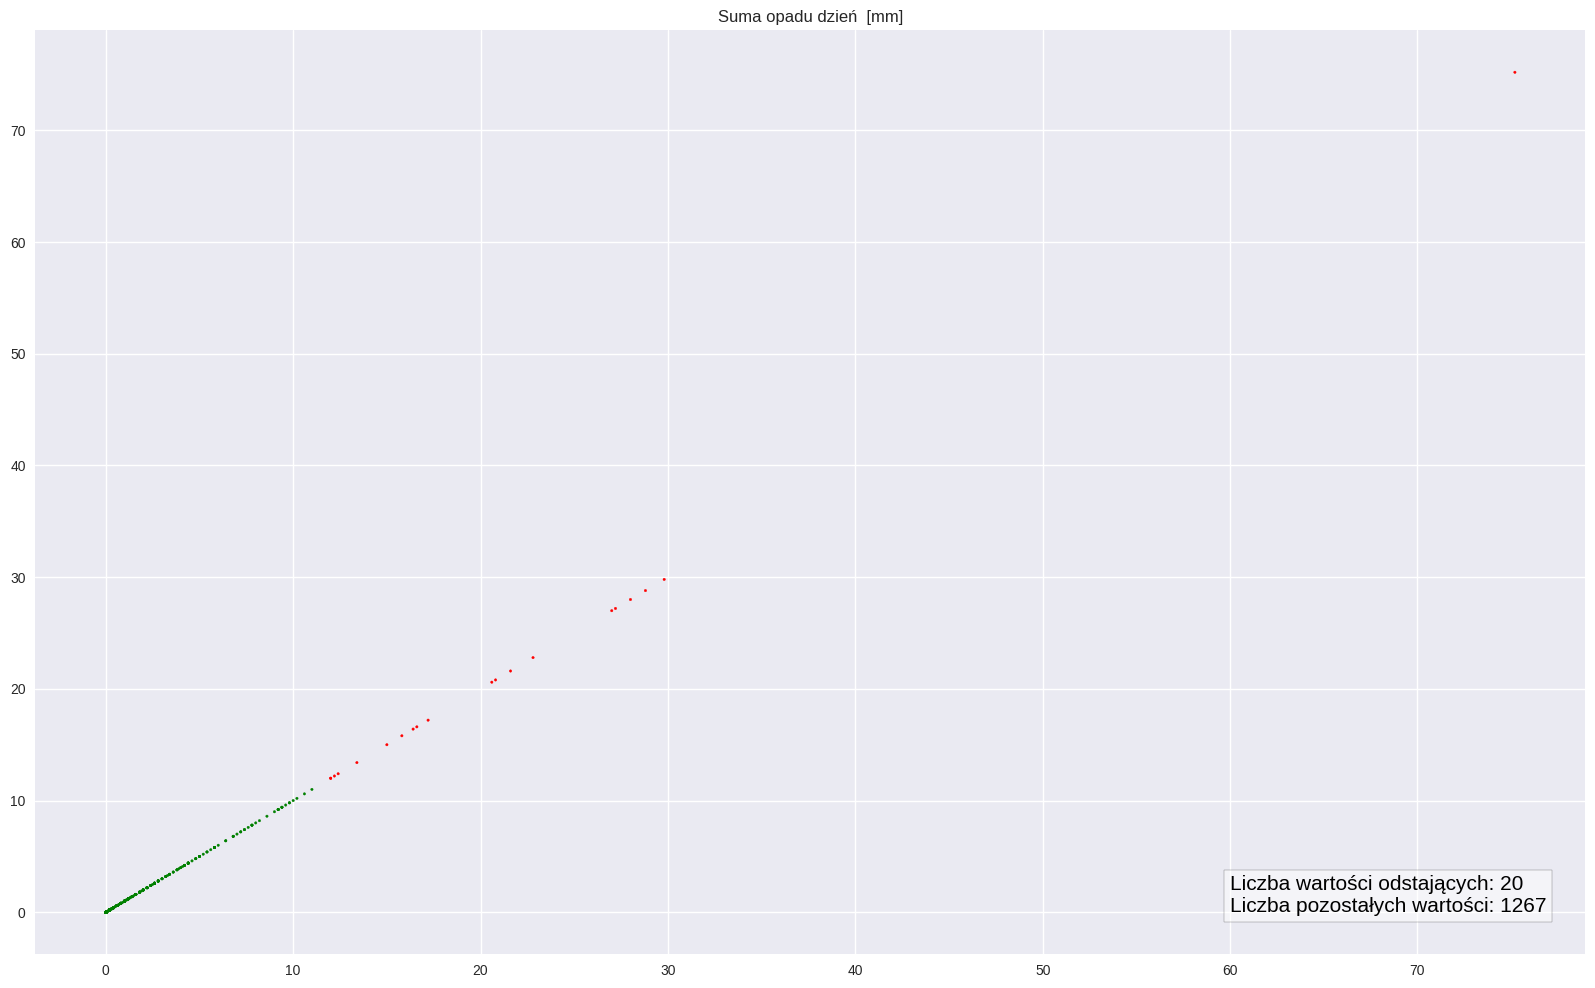

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
#wizualizacja kolumny 'Suma opadu dzień [mm]' względem samej siebie, w celu zidentyfikowania wartości odstających (Z-score)
index = 12

column = column_names[index]

upper_limit = df_df_pm10[column].mean() + 3*df_df_pm10[column].std()
lower_limit = df_df_pm10[column].mean() - 3*df_df_pm10[column].std()

#ustawienia grafu
plt.figure(figsize=(20,12))
sns.color_palette("flare", as_cmap=True)
plt.style.use('seaborn')

#wyświetlenie grafu z inna kolorystyką w zależności od odstawania od średniej
col = np.where(df_df_pm10[column]>lower_limit,np.where(df_df_pm10[column]<upper_limit,'g','r'),'r')
plt.scatter(df_df_pm10[column], df_df_pm10[column],s=3,c=col)
plt.title(column)
#zapis do pliku

valAbove = df_df_pm10[column][df_df_pm10[column]>upper_limit].count()

valUnder = df_df_pm10[column][df_df_pm10[column]<lower_limit].count()
valIn = df_df_pm10[column][df_df_pm10[column]<upper_limit].count() - valUnder;
valOutliners = valAbove + valUnder;

arr = textIndex[index]

plt.text(x=arr[0],
         y=arr[1],
         s="Liczba wartości odstających: " + str(valOutliners) + "\n" + "Liczba pozostałych wartości: " + str(valIn),
         fontdict=dict(color='black',size=15),
         bbox=dict(facecolor='white',alpha=0.5))


plt.savefig('/content/drive/MyDrive/AirPolution/' + 'Średnia dobowa prędkość wiatru [ms]' + ".png")
plt.show()
plt.close

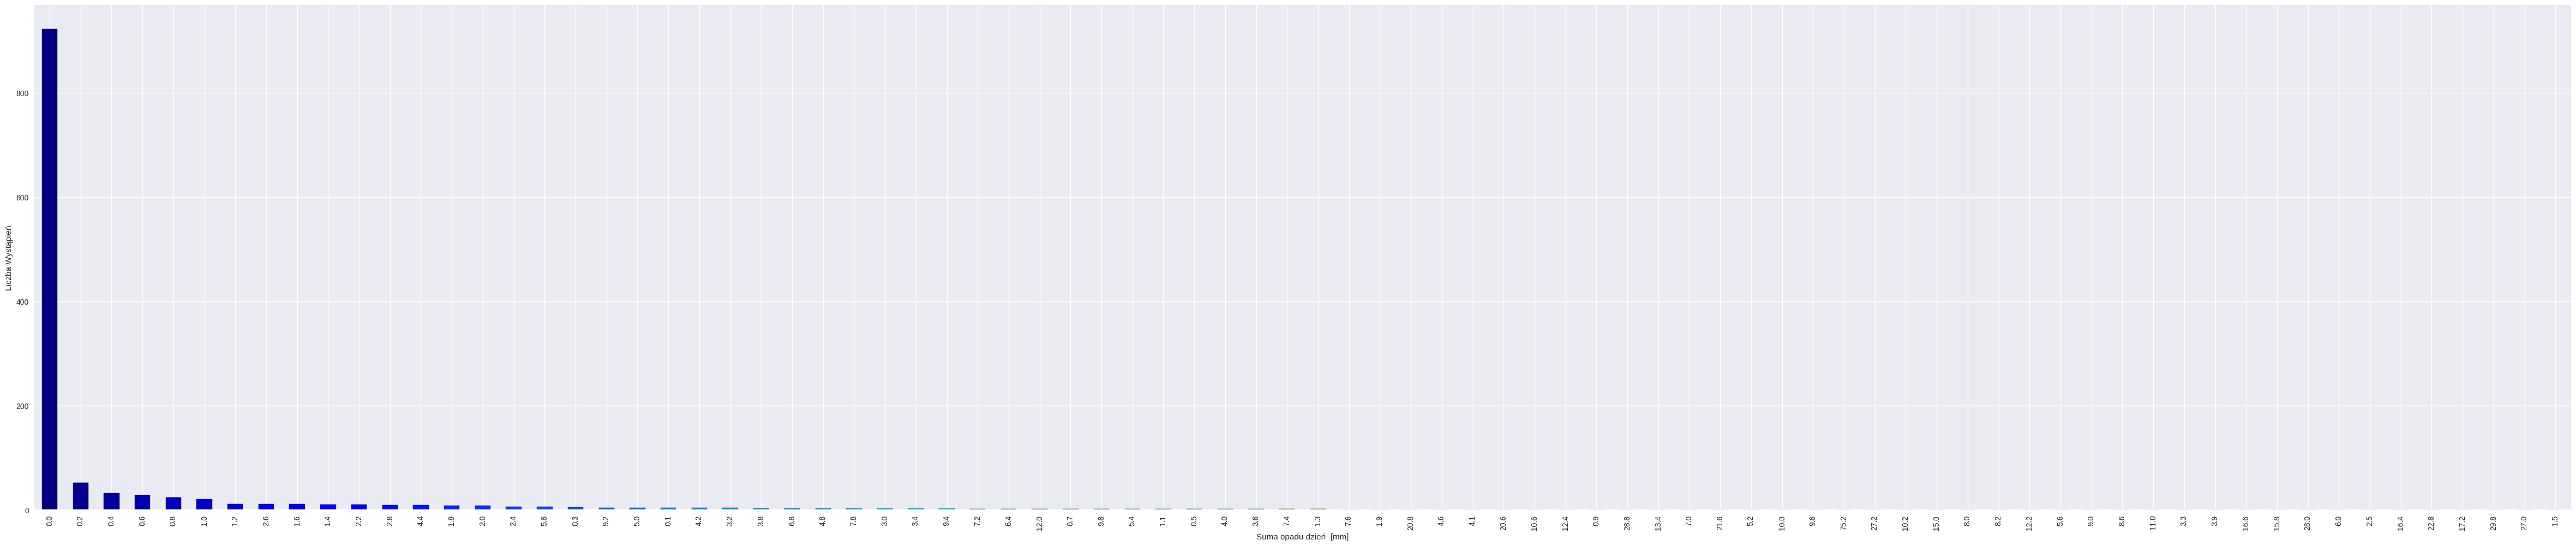

In [ ]:
#histogram ilości wystąpień wartości we wskazanej kolumnie
colors = plt.cm.jet(np.linspace(0, 1, len(df_df_pm10[column].value_counts())))
plt.figure(figsize=(60,12))

plt.ylabel('Liczba Wystąpień')
plt.xlabel(column)


df_df_pm10[column].value_counts().plot(kind="bar",color=colors,edgecolor='black')
plt.savefig('/content/drive/MyDrive/AirPolution/' + 'Średnia dobowa prędkość wiatru [ms]' + "HIST.png")

In [ ]:
#utworzenie tablicy z indexami kolumn, które nas interesują
index=0
for column in column_names:
  print(str(index) +": " + str(column))
  index+=1

colToIndex = [1,4,7,12]

0: Data
1: Maksymalna temperatura dobowa [°C]
2: Minimalna temperatura dobowa [°C]
3: Temperatura minimalna przy gruncie [°C]
4: Suma dobowa opadów [mm]
5: Rodzaj opadu  [S/W/ ]
6: Wysokość pokrywy śnieżnej [cm]
7: Średnia temperatura dobowa [°C]
8: Średnia dobowa wilgotność względna [%]
9: Średnia dobowa prędkość wiatru [m/s]
10: Średnie dobowe zachmurzenie ogólne [oktanty]
11: Średnia dobowe ciśnienie na poziomie stacji [hPa]
12: Suma opadu dzień  [mm]
13: Location
14: PM10
15: PM10+24
16: PM2.5
17: O3
18: Dzień Roku
19: Dzień Tygodnia
20: Róznica Maksymalnej i Minimalnej temperatury [°C]
21: Temperatura punktu Rosy [°C]


In [ ]:
df_standarized = df_df_pm10

In [ ]:
display(df_df_pm10)

,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
2557,2008-01-02,0.7,-4.4,-8.1,0.0,0,2,-3.1,85.0,5.3,1.3,1006.7,0.0,1,28.1,31.4,80.500,25.0,1,1,5.1,-5.264546
2558,2008-01-03,-4.3,-10.8,-12.2,0.0,0,2,-8.2,79.3,7.0,5.7,1003.3,1.2,1,31.4,27.7,50.400,47.0,2,2,6.5,-11.148565
2559,2008-01-04,-6.3,-8.3,-11.2,0.0,0,1,-7.8,74.5,9.9,7.3,1008.3,0.0,1,27.7,31.4,41.300,48.0,3,3,2.0,-11.542363
2560,2008-01-05,-6.7,-12.3,-14.6,0.0,0,1,-10.8,67.5,8.8,0.7,1004.0,0.0,1,31.4,31.7,20.300,45.0,4,4,5.6,-15.645621
2561,2008-01-06,-0.4,-12.3,-13.2,4.2,2,0,-4.2,90.5,5.9,5.7,992.9,0.4,1,31.7,49.1,11.200,4.0,5,5,11.9,-5.521952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2011-12-26,9.1,3.0,2.8,0.3,1,0,6.5,94.5,5.1,1.3,996.5,0.0,1,32.5,14.6,23.025,15.7,342,2,6.1,5.680341
4012,2011-12-27,8.9,8.1,7.1,0.4,1,0,8.5,92.6,5.8,4.3,995.7,0.6,1,14.6,21.0,16.354,27.0,343,3,0.8,7.369501
4013,2011-12-28,8.4,1.5,-1.6,0.0,0,0,4.6,89.9,2.4,3.0,1005.1,0.0,1,21.0,23.0,19.242,17.9,344,4,6.9,3.085023
4014,2011-12-29,6.8,3.7,3.5,0.0,0,0,4.9,80.8,3.3,4.7,1008.6,0.0,1,23.0,26.4,43.638,28.6,345,5,3.1,1.877730


In [ ]:
df_df_pm10 = df_standarized

In [ ]:
for colIndex in colToIndex:

  upper_limit = df_df_pm10[column_names[colIndex]].mean() + 3*df_df_pm10[column_names[colIndex]].std()
  lower_limit = df_df_pm10[column_names[colIndex]].mean() - 3*df_df_pm10[column_names[colIndex]].std()

  for index,row in df_df_pm10.iterrows():
    if(df_df_pm10.loc[index,column_names[colIndex]]<lower_limit):
      df_df_pm10.loc[index,column_names[colIndex]] = lower_limit
    else:
      if(df_df_pm10.loc[index,column_names[colIndex]]>upper_limit):
        df_df_pm10.loc[index,column_names[colIndex]] = upper_limit

ValueError: could not convert string to float: '2008-01-02'

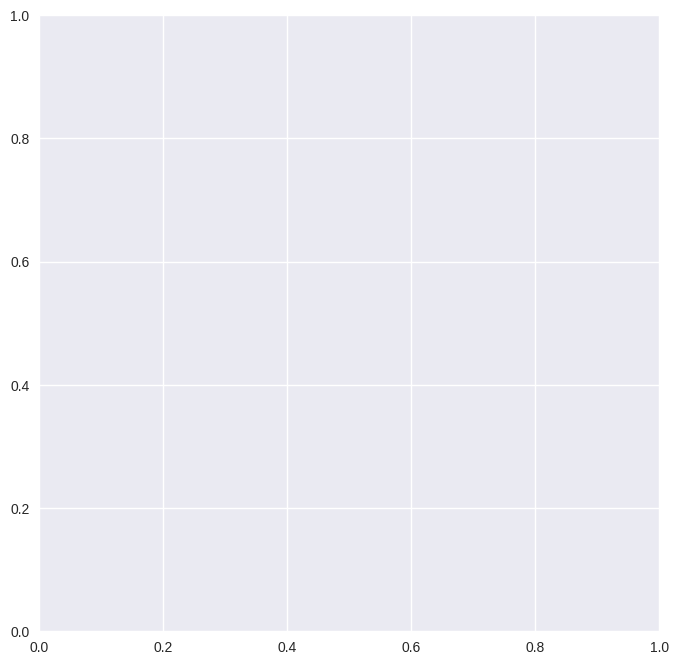

In [ ]:
#wizualizacja relacji pomiędzy cechami

import matplotlib.pyplot as plt

def correlation_heatmap(train):


    fig, ax = plt.subplots(figsize=(8,8))
    rdgn = sns.diverging_palette(h_neg=5, h_pos=5, s=70, l=55, sep=3, as_cmap=True)
    sns.heatmap(train.corr(),cmap=rdgn,  vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True)
    plt.show();

correlation_heatmap(df_df_pm10)

# Test (sprawdzenie poprawności dokonanych zmian)

In [ ]:
df_remember.describe()

NameError: name 'df_remember' is not defined

In [ ]:
df_df_pm10.describe()

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1285.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1285.000000
mean,14.146775,5.570163,3.506294,1.615245,2.323232,9.427214,77.590973,3.291764,2.914763,1002.384149,0.769388,1.0,31.656876,31.698601,25.622876,31.472106,164.307692,3.997669,8.576612,5.430452
std,9.908589,7.853443,8.169711,3.247405,7.566991,8.777675,13.203691,1.648623,2.619237,8.395069,2.108735,0.0,19.209330,19.315357,18.502859,22.923391,97.339468,1.999804,3.933329,7.792345
min,-15.000000,-24.000000,-26.200000,0.000000,0.000000,-16.958685,33.500000,0.000000,0.000000,972.400000,0.000000,1.0,4.500000,4.500000,1.800000,0.000000,1.000000,1.000000,0.200000,-22.858874
25%,6.600000,0.450000,-1.500000,0.000000,0.000000,3.000000,69.400000,2.100000,0.000000,997.600000,0.000000,1.0,18.300000,18.300000,13.563500,11.000000,81.000000,2.000000,5.400000,0.467278
50%,15.000000,5.800000,3.600000,0.000000,0.000000,9.800000,79.300000,3.100000,2.700000,1002.800000,0.000000,1.0,27.400000,27.400000,19.800000,31.000000,161.000000,4.000000,8.000000,5.354105
75%,22.500000,12.000000,10.100000,1.500000,0.000000,16.950000,88.100000,4.100000,5.000000,1007.700000,0.200000,1.0,39.550000,39.900000,31.646000,49.000000,242.000000,6.000000,11.700000,11.449240
max,35.300000,21.700000,20.000000,14.939261,52.000000,28.200000,100.000000,11.900000,8.000000,1027.200000,11.590146,1.0,168.900000,168.900000,158.962000,99.000000,354.000000,7.000000,18.600000,21.561860


In [ ]:
df_df_pm10.describe()

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,PM10,PM10+24,PM2.5,O3,Dzień Roku,Dzień Tygodnia,Róznica Maksymalnej i Minimalnej temperatury [°C],Temperatura punktu Rosy [°C]
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1285.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1285.000000
mean,14.146775,5.570163,3.506294,1.615245,2.323232,9.427214,77.590973,3.291764,2.914763,1002.384149,0.769388,1.0,31.656876,31.698601,25.622876,31.472106,164.307692,3.997669,8.576612,5.430452
std,9.908589,7.853443,8.169711,3.247405,7.566991,8.777675,13.203691,1.648623,2.619237,8.395069,2.108735,0.0,19.209330,19.315357,18.502859,22.923391,97.339468,1.999804,3.933329,7.792345
min,-15.000000,-24.000000,-26.200000,0.000000,0.000000,-16.958685,33.500000,0.000000,0.000000,972.400000,0.000000,1.0,4.500000,4.500000,1.800000,0.000000,1.000000,1.000000,0.200000,-22.858874
25%,6.600000,0.450000,-1.500000,0.000000,0.000000,3.000000,69.400000,2.100000,0.000000,997.600000,0.000000,1.0,18.300000,18.300000,13.563500,11.000000,81.000000,2.000000,5.400000,0.467278
50%,15.000000,5.800000,3.600000,0.000000,0.000000,9.800000,79.300000,3.100000,2.700000,1002.800000,0.000000,1.0,27.400000,27.400000,19.800000,31.000000,161.000000,4.000000,8.000000,5.354105
75%,22.500000,12.000000,10.100000,1.500000,0.000000,16.950000,88.100000,4.100000,5.000000,1007.700000,0.200000,1.0,39.550000,39.900000,31.646000,49.000000,242.000000,6.000000,11.700000,11.449240
max,35.300000,21.700000,20.000000,14.939261,52.000000,28.200000,100.000000,11.900000,8.000000,1027.200000,11.590146,1.0,168.900000,168.900000,158.962000,99.000000,354.000000,7.000000,18.600000,21.561860


# Zamiana wartości numerycznych pm10 na kategorie według indeksu GIOŚ

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24,PM10+24cat
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,31.4,dobre
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,27.7,dobre
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,31.4,dobre
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,31.7,dobre
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,49.1,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,14.6,bardzo dobre
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,21.0,dobre
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,23.0,dobre
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,26.4,dobre


In [ ]:
df_df_pm10.isna().sum()

Maksymalna temperatura dobowa [°C]                   0
Minimalna temperatura dobowa [°C]                    0
Temperatura minimalna przy gruncie [°C]              0
Róznica Maksymalnej i Minimalnej temperatury [°C]    0
Suma dobowa opadów [mm]                              0
Rodzaj opadu  [S/W/ ]                                0
Wysokość pokrywy śnieżnej [cm]                       0
Średnia temperatura dobowa [°C]                      0
Średnia dobowa wilgotność względna [%]               2
Temperatura punktu Rosy [°C]                         2
Średnia dobowa prędkość wiatru [m/s]                 0
Średnie dobowe zachmurzenie ogólne [oktanty]         0
Średnia dobowe ciśnienie na poziomie stacji [hPa]    0
Suma opadu dzień  [mm]                               0
Location                                             0
Dzień Roku                                           0
Dzień Tygodnia                                       0
PM2.5                                                0
O3        

In [ ]:
reArr = ['Maksymalna temperatura dobowa [°C]','Minimalna temperatura dobowa [°C]','Temperatura minimalna przy gruncie [°C]','Róznica Maksymalnej i Minimalnej temperatury [°C]','Suma dobowa opadów [mm]','Rodzaj opadu  [S/W/ ]','Wysokość pokrywy śnieżnej [cm]','Średnia temperatura dobowa [°C]','Średnia dobowa wilgotność względna [%]','Temperatura punktu Rosy [°C]','Średnia dobowa prędkość wiatru [m/s]','Średnie dobowe zachmurzenie ogólne [oktanty]','Średnia dobowe ciśnienie na poziomie stacji [hPa]','Suma opadu dzień  [mm]','Location','Dzień Roku','Dzień Tygodnia',"PM2.5","O3",pm,pm24]
df_df_pm10=df_df_pm10[reArr]

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,31.4
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,27.7
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,31.4
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,31.7
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,49.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,14.6
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,21.0
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,23.0
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,26.4


In [ ]:
print(df_df_pm10.dtypes)

Maksymalna temperatura dobowa [°C]                   float64
Minimalna temperatura dobowa [°C]                    float64
Temperatura minimalna przy gruncie [°C]              float64
Róznica Maksymalnej i Minimalnej temperatury [°C]    float64
Suma dobowa opadów [mm]                              float64
Rodzaj opadu  [S/W/ ]                                 object
Wysokość pokrywy śnieżnej [cm]                         int64
Średnia temperatura dobowa [°C]                      float64
Średnia dobowa wilgotność względna [%]               float64
Temperatura punktu Rosy [°C]                         float64
Średnia dobowa prędkość wiatru [m/s]                 float64
Średnie dobowe zachmurzenie ogólne [oktanty]         float64
Średnia dobowe ciśnienie na poziomie stacji [hPa]    float64
Suma opadu dzień  [mm]                               float64
Location                                               int64
Dzień Roku                                             int64
Dzień Tygodnia          

In [ ]:
category = ['bardzo dobre', 'dobre', 'umiarkowane', 'dostateczne','złe','bardzo złe']


for index, row in df_df_pm10.iterrows():
  val = df_df_pm10.loc[index,pm24]

  if(val>20.1):
    if(val>50.1):
      if(val>80.1):
        if(val>110.1):
          if(val>150):
            df_df_pm10.loc[index,pmcat24] = category[5]
          else:
            df_df_pm10.loc[index,pmcat24] = category[4]
        else:
          df_df_pm10.loc[index,pmcat24] = category[3]
      else:
        df_df_pm10.loc[index,pmcat24] = category[2]
    else:
      df_df_pm10.loc[index,pmcat24] = category[1]
  else:
    df_df_pm10.loc[index,pmcat24] = category[0]

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24,PM10+24cat
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,31.4,dobre
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,27.7,dobre
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,31.4,dobre
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,31.7,dobre
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,49.1,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,14.6,bardzo dobre
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,21.0,dobre
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,23.0,dobre
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,26.4,dobre


# Skalowanie

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()


df_df_pm10[['Maksymalna temperatura dobowa [°C]',
            'Minimalna temperatura dobowa [°C]',
            'Temperatura minimalna przy gruncie [°C]',
            'Wysokość pokrywy śnieżnej [cm]',
            'Średnia temperatura dobowa [°C]',
            'Średnia dobowa wilgotność względna [%]',
            'Średnia dobowa prędkość wiatru [m/s]',
            'Średnie dobowe zachmurzenie ogólne [oktanty]',
            'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
            'Róznica Maksymalnej i Minimalnej temperatury [°C]',
            'Temperatura punktu Rosy [°C]',
            'PM2.5',
            'O3']] = mms.fit_transform(df_df_pm10[['Maksymalna temperatura dobowa [°C]',
                                                                                                                    'Minimalna temperatura dobowa [°C]',
                                                                                                                    'Temperatura minimalna przy gruncie [°C]',
                                                                                                                    'Wysokość pokrywy śnieżnej [cm]',
                                                                                                                    'Średnia temperatura dobowa [°C]',
                                                                                                                    'Średnia dobowa wilgotność względna [%]',
                                                                                                                    'Średnia dobowa prędkość wiatru [m/s]',
                                                                                                                    'Średnie dobowe zachmurzenie ogólne [oktanty]',
                                                                                                                    'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
                                                                                                                    'Róznica Maksymalnej i Minimalnej temperatury [°C]',
                                                                                                                    'Temperatura punktu Rosy [°C]',
                                                    'PM2.5',
            'O3']])




In [ ]:
print(df_df_pm10.columns)

In [ ]:
display(df_df_pm10)

# -pre (oversampling)

In [ ]:
df_testing = df_df_pm10.drop("PM10+24",axis=1)

In [ ]:
df_testing = df_testing.drop("PM10+24cat",axis=1)

In [ ]:
display(df_testing)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0


In [ ]:
df_df_pm10 = df_testing

In [ ]:
category = ['bardzo dobre', 'dobre', 'umiarkowane', 'dostateczne','złe','bardzo złe']


for index, row in df_df_pm10.iterrows():
  val = df_df_pm10.loc[index,pm]

  if(val>20.1):
    if(val>50.1):
      if(val>80.1):
        if(val>110.1):
          if(val>150):
            df_df_pm10.loc[index,pmcat] = category[5]
          else:
            df_df_pm10.loc[index,pmcat] = category[4]
        else:
          df_df_pm10.loc[index,pmcat] = category[3]
      else:
        df_df_pm10.loc[index,pmcat] = category[2]
    else:
      df_df_pm10.loc[index,pmcat] = category[1]
  else:
    df_df_pm10.loc[index,pmcat] = category[0]

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,dobre
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,dobre
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,dobre
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,dobre
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,dobre
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,bardzo dobre
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,dobre
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,dobre


# Oversampling

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
2557,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,dobre
2558,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,dobre
2559,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,dobre
2560,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,dobre
2561,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,dobre
4012,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,bardzo dobre
4013,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,dobre
4014,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,dobre


In [ ]:
df_df_pm10 = df_df_pm10.reset_index()

In [ ]:
df_df_pm10 = df_df_pm10.drop('index',axis=1)

In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
0,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,dobre
1,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,dobre
2,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,dobre
3,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,dobre
4,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,dobre
1283,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,bardzo dobre
1284,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,dobre
1285,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,dobre


In [ ]:
df_temp = df_df_pm10.dropna()


In [ ]:
display(df_temp)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
0,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,dobre
1,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,dobre
2,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,dobre
3,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,dobre
4,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,dobre
1283,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,bardzo dobre
1284,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,dobre
1285,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,dobre


In [ ]:
display(df_temp[df_temp[pmcat24] == 'dostateczne'].sort_values(by='PM10',ascending=False))

KeyError: 'PM10+24cat'

In [ ]:
X, y = df_temp.loc[:, df_temp.columns != pmcat], df_temp[pmcat]

In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10
0,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1
1,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4
2,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7
3,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4
4,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5
1283,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6
1284,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0
1285,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0


In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

Class=2, n=710 (55.253%)
Class=4, n=140 (10.895%)
Class=3, n=28 (2.179%)
Class=0, n=401 (31.206%)
Class=1, n=2 (0.156%)
Class=5, n=4 (0.311%)


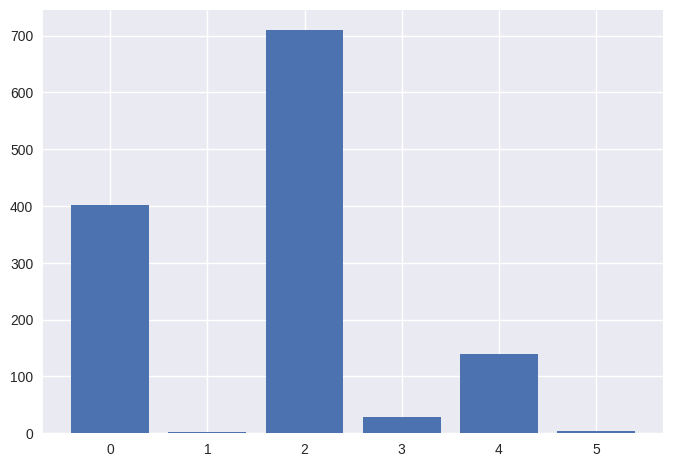

In [ ]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sum=0

for index,rows in df_temp.iterrows():
  if df_temp.loc[index,pmcat] == 'bardzo złe':
    sum+=1

print(sum)

2


In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10
0,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1
1,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4
2,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7
3,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4
4,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5
1283,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6
1284,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0
1285,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0


In [ ]:
display(df_df_pm10)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
0,0.7,-4.4,-8.1,5.1,0.0,0,2,-3.1,85.0,-5.264546,5.3,1.3,1006.7,0.0,1,1,1,80.500,25.0,28.1,dobre
1,-4.3,-10.8,-12.2,6.5,0.0,0,2,-8.2,79.3,-11.148565,7.0,5.7,1003.3,1.2,1,2,2,50.400,47.0,31.4,dobre
2,-6.3,-8.3,-11.2,2.0,0.0,0,1,-7.8,74.5,-11.542363,9.9,7.3,1008.3,0.0,1,3,3,41.300,48.0,27.7,dobre
3,-6.7,-12.3,-14.6,5.6,0.0,0,1,-10.8,67.5,-15.645621,8.8,0.7,1004.0,0.0,1,4,4,20.300,45.0,31.4,dobre
4,-0.4,-12.3,-13.2,11.9,4.2,2,0,-4.2,90.5,-5.521952,5.9,5.7,992.9,0.4,1,5,5,11.200,4.0,31.7,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,9.1,3.0,2.8,6.1,0.3,1,0,6.5,94.5,5.680341,5.1,1.3,996.5,0.0,1,342,2,23.025,15.7,32.5,dobre
1283,8.9,8.1,7.1,0.8,0.4,1,0,8.5,92.6,7.369501,5.8,4.3,995.7,0.6,1,343,3,16.354,27.0,14.6,bardzo dobre
1284,8.4,1.5,-1.6,6.9,0.0,0,0,4.6,89.9,3.085023,2.4,3.0,1005.1,0.0,1,344,4,19.242,17.9,21.0,dobre
1285,6.8,3.7,3.5,3.1,0.0,0,0,4.9,80.8,1.877730,3.3,4.7,1008.6,0.0,1,345,5,43.638,28.6,23.0,dobre


Class=2, n=665 (36.141%)
Class=4, n=359 (19.511%)
Class=3, n=200 (10.870%)
Class=0, n=416 (22.609%)
Class=1, n=80 (4.348%)
Class=5, n=120 (6.522%)


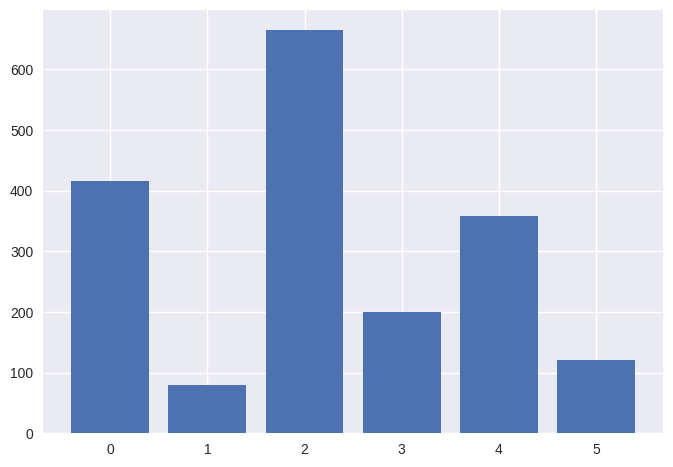

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
y = LabelEncoder().fit_transform(y)

#dla 0 powiekszenie o 10%, dla 1 powiekszenie o 6000%, dla 2 nic , dla 3 o 1500 %, dla 4 o 150%, dla 5 o 2000%

strategy = {0:460, 1:80, 2:710,3:200,4:360,5:120}
smote = SMOTE(sampling_strategy=strategy, k_neighbors=1, random_state=42)

# Inicjalizacja SMOTETomek z powyższym SMOTE
oversample = SMOTETomek(smote=smote, random_state=42)


X, y = oversample.fit_resample(X, y)


counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10
0,0.700000,-4.400000,-8.100000,5.100000,0.000000,0.0,2,-3.100000,85.000000,-5.264546,5.300000,1.300000,1006.700000,0.0,1,1,1,80.500000,25.000000,28.100000
1,-4.300000,-10.800000,-12.200000,6.500000,0.000000,0.0,2,-8.200000,79.300000,-11.148565,7.000000,5.700000,1003.300000,1.2,1,2,2,50.400000,47.000000,31.400000
2,-6.300000,-8.300000,-11.200000,2.000000,0.000000,0.0,1,-7.800000,74.500000,-11.542363,9.900000,7.300000,1008.300000,0.0,1,3,3,41.300000,48.000000,27.700000
3,-6.700000,-12.300000,-14.600000,5.600000,0.000000,0.0,1,-10.800000,67.500000,-15.645621,8.800000,0.700000,1004.000000,0.0,1,4,4,20.300000,45.000000,31.400000
4,-0.400000,-12.300000,-13.200000,11.900000,4.200000,2.0,0,-4.200000,90.500000,-5.521952,5.900000,5.700000,992.900000,0.4,1,5,5,11.200000,4.000000,31.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-10.686482,-20.018250,-25.013590,9.331768,0.000000,0.0,16,-15.328597,81.563501,-18.906306,1.113661,2.331910,1002.254216,0.0,1,9,2,40.077055,10.945571,111.590893
1836,-14.355129,-22.983653,-24.041602,8.628525,0.161218,0.644871,26,-16.958685,76.503269,-22.779133,1.806539,6.344871,988.491091,0.0,1,17,2,36.356150,10.782632,120.995505
1837,0.462321,-2.860429,-3.974885,3.322750,0.295024,1.966824,3,-1.710665,90.900473,-2.999844,3.056872,0.000000,984.146213,0.0,1,13,3,32.225594,2.099527,111.606635
1838,-11.261721,-20.349209,-24.785070,9.087488,0.000000,0.0,17,-15.545981,80.901582,-19.433409,1.231860,2.781070,1000.646698,0.0,1,10,2,39.013256,11.512930,111.512093


In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
y = le.inverse_transform(y)
#X.loc[:,pmcat] = le.inverse_transform(X.loc[:,pmcat])

X[pmcat] = y

In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat
0,0.700000,-4.400000,-8.100000,5.100000,0.000000,0.0,2,-3.100000,85.000000,-5.264546,5.300000,1.300000,1006.700000,0.0,1,1,1,80.500000,25.000000,28.100000,dobre
1,-4.300000,-10.800000,-12.200000,6.500000,0.000000,0.0,2,-8.200000,79.300000,-11.148565,7.000000,5.700000,1003.300000,1.2,1,2,2,50.400000,47.000000,31.400000,dobre
2,-6.300000,-8.300000,-11.200000,2.000000,0.000000,0.0,1,-7.800000,74.500000,-11.542363,9.900000,7.300000,1008.300000,0.0,1,3,3,41.300000,48.000000,27.700000,dobre
3,-6.700000,-12.300000,-14.600000,5.600000,0.000000,0.0,1,-10.800000,67.500000,-15.645621,8.800000,0.700000,1004.000000,0.0,1,4,4,20.300000,45.000000,31.400000,dobre
4,-0.400000,-12.300000,-13.200000,11.900000,4.200000,2.0,0,-4.200000,90.500000,-5.521952,5.900000,5.700000,992.900000,0.4,1,5,5,11.200000,4.000000,31.700000,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-10.686482,-20.018250,-25.013590,9.331768,0.000000,0.0,16,-15.328597,81.563501,-18.906306,1.113661,2.331910,1002.254216,0.0,1,9,2,40.077055,10.945571,111.590893,złe
1836,-14.355129,-22.983653,-24.041602,8.628525,0.161218,0.644871,26,-16.958685,76.503269,-22.779133,1.806539,6.344871,988.491091,0.0,1,17,2,36.356150,10.782632,120.995505,złe
1837,0.462321,-2.860429,-3.974885,3.322750,0.295024,1.966824,3,-1.710665,90.900473,-2.999844,3.056872,0.000000,984.146213,0.0,1,13,3,32.225594,2.099527,111.606635,złe
1838,-11.261721,-20.349209,-24.785070,9.087488,0.000000,0.0,17,-15.545981,80.901582,-19.433409,1.231860,2.781070,1000.646698,0.0,1,10,2,39.013256,11.512930,111.512093,złe


In [ ]:
X["PM10+24"] = X[pm].shift(-1)

In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10cat,PM10+24
0,0.700000,-4.400000,-8.100000,5.100000,0.000000,0.0,2,-3.100000,85.000000,-5.264546,5.300000,1.300000,1006.700000,0.0,1,1,1,80.500000,25.000000,28.100000,dobre,31.400000
1,-4.300000,-10.800000,-12.200000,6.500000,0.000000,0.0,2,-8.200000,79.300000,-11.148565,7.000000,5.700000,1003.300000,1.2,1,2,2,50.400000,47.000000,31.400000,dobre,27.700000
2,-6.300000,-8.300000,-11.200000,2.000000,0.000000,0.0,1,-7.800000,74.500000,-11.542363,9.900000,7.300000,1008.300000,0.0,1,3,3,41.300000,48.000000,27.700000,dobre,31.400000
3,-6.700000,-12.300000,-14.600000,5.600000,0.000000,0.0,1,-10.800000,67.500000,-15.645621,8.800000,0.700000,1004.000000,0.0,1,4,4,20.300000,45.000000,31.400000,dobre,31.700000
4,-0.400000,-12.300000,-13.200000,11.900000,4.200000,2.0,0,-4.200000,90.500000,-5.521952,5.900000,5.700000,992.900000,0.4,1,5,5,11.200000,4.000000,31.700000,dobre,49.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-10.686482,-20.018250,-25.013590,9.331768,0.000000,0.0,16,-15.328597,81.563501,-18.906306,1.113661,2.331910,1002.254216,0.0,1,9,2,40.077055,10.945571,111.590893,złe,120.995505
1836,-14.355129,-22.983653,-24.041602,8.628525,0.161218,0.644871,26,-16.958685,76.503269,-22.779133,1.806539,6.344871,988.491091,0.0,1,17,2,36.356150,10.782632,120.995505,złe,111.606635
1837,0.462321,-2.860429,-3.974885,3.322750,0.295024,1.966824,3,-1.710665,90.900473,-2.999844,3.056872,0.000000,984.146213,0.0,1,13,3,32.225594,2.099527,111.606635,złe,111.512093
1838,-11.261721,-20.349209,-24.785070,9.087488,0.000000,0.0,17,-15.545981,80.901582,-19.433409,1.231860,2.781070,1000.646698,0.0,1,10,2,39.013256,11.512930,111.512093,złe,134.978631


In [ ]:
category = ['bardzo dobre', 'dobre', 'umiarkowane', 'dostateczne','złe','bardzo złe']


for index, row in X.iterrows():
  val = X.loc[index,pm24]

  if(val>20.1):
    if(val>50.1):
      if(val>80.1):
        if(val>110.1):
          if(val>150):
            X.loc[index,pmcat24] = category[5]
          else:
            X.loc[index,pmcat24] = category[4]
        else:
          X.loc[index,pmcat24] = category[3]
      else:
        X.loc[index,pmcat24] = category[2]
    else:
      X.loc[index,pmcat24] = category[1]
  else:
    X.loc[index,pmcat24] = category[0]

In [ ]:
reArr = ['Maksymalna temperatura dobowa [°C]','Minimalna temperatura dobowa [°C]','Temperatura minimalna przy gruncie [°C]','Róznica Maksymalnej i Minimalnej temperatury [°C]','Suma dobowa opadów [mm]','Rodzaj opadu  [S/W/ ]','Wysokość pokrywy śnieżnej [cm]','Średnia temperatura dobowa [°C]','Średnia dobowa wilgotność względna [%]','Temperatura punktu Rosy [°C]','Średnia dobowa prędkość wiatru [m/s]','Średnie dobowe zachmurzenie ogólne [oktanty]','Średnia dobowe ciśnienie na poziomie stacji [hPa]','Suma opadu dzień  [mm]','Location','Dzień Roku','Dzień Tygodnia',"PM2.5","O3",pm,pm24,pmcat,pmcat24]
X=X[reArr]

In [ ]:
display(X)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24,PM10cat,PM10+24cat
0,0.700000,-4.400000,-8.100000,5.100000,0.000000,0.0,2,-3.100000,85.000000,-5.264546,5.300000,1.300000,1006.700000,0.0,1,1,1,80.500000,25.000000,28.100000,31.400000,dobre,dobre
1,-4.300000,-10.800000,-12.200000,6.500000,0.000000,0.0,2,-8.200000,79.300000,-11.148565,7.000000,5.700000,1003.300000,1.2,1,2,2,50.400000,47.000000,31.400000,27.700000,dobre,dobre
2,-6.300000,-8.300000,-11.200000,2.000000,0.000000,0.0,1,-7.800000,74.500000,-11.542363,9.900000,7.300000,1008.300000,0.0,1,3,3,41.300000,48.000000,27.700000,31.400000,dobre,dobre
3,-6.700000,-12.300000,-14.600000,5.600000,0.000000,0.0,1,-10.800000,67.500000,-15.645621,8.800000,0.700000,1004.000000,0.0,1,4,4,20.300000,45.000000,31.400000,31.700000,dobre,dobre
4,-0.400000,-12.300000,-13.200000,11.900000,4.200000,2.0,0,-4.200000,90.500000,-5.521952,5.900000,5.700000,992.900000,0.4,1,5,5,11.200000,4.000000,31.700000,49.100000,dobre,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-10.686482,-20.018250,-25.013590,9.331768,0.000000,0.0,16,-15.328597,81.563501,-18.906306,1.113661,2.331910,1002.254216,0.0,1,9,2,40.077055,10.945571,111.590893,120.995505,złe,złe
1836,-14.355129,-22.983653,-24.041602,8.628525,0.161218,0.644871,26,-16.958685,76.503269,-22.779133,1.806539,6.344871,988.491091,0.0,1,17,2,36.356150,10.782632,120.995505,111.606635,złe,złe
1837,0.462321,-2.860429,-3.974885,3.322750,0.295024,1.966824,3,-1.710665,90.900473,-2.999844,3.056872,0.000000,984.146213,0.0,1,13,3,32.225594,2.099527,111.606635,111.512093,złe,złe
1838,-11.261721,-20.349209,-24.785070,9.087488,0.000000,0.0,17,-15.545981,80.901582,-19.433409,1.231860,2.781070,1000.646698,0.0,1,10,2,39.013256,11.512930,111.512093,134.978631,złe,złe


In [ ]:
X.to_csv('Final_oversampled(SmoteTomek).csv')

In [ ]:
display(X.columns)

Index(['Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]',
       'Róznica Maksymalnej i Minimalnej temperatury [°C]',
       'Suma dobowa opadów [mm]', 'Rodzaj opadu  [S/W/ ]',
       'Wysokość pokrywy śnieżnej [cm]', 'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Temperatura punktu Rosy [°C]', 'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]', 'Location', 'Dzień Roku', 'Dzień Tygodnia',
       'PM2.5', 'O3', 'PM10', 'PM10+24', 'PM10cat', 'PM10+24cat'],
      dtype='object')

In [ ]:
remeberX = X

In [ ]:
X = X[['Temperatura minimalna przy gruncie [°C]',
       'Róznica Maksymalnej i Minimalnej temperatury [°C]',
       'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]',
       'Location',
       'Dzień Roku',
       'Dzień Tygodnia',
       pm, pmcat, pmcat24]]

In [ ]:
display(X)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat,PM10+24cat
0,-8.100000,5.100000,-3.100000,85.000000,5.300000,1.300000,1006.700000,0.0,1,1,1,28.100000,dobre,dobre
1,-12.200000,6.500000,-8.200000,79.300000,7.000000,5.700000,1003.300000,1.2,1,2,2,31.400000,dobre,dobre
2,-11.200000,2.000000,-7.800000,74.500000,9.900000,7.300000,1008.300000,0.0,1,3,3,27.700000,dobre,dobre
3,-14.600000,5.600000,-10.800000,67.500000,8.800000,0.700000,1004.000000,0.0,1,4,4,31.400000,dobre,dobre
4,-13.200000,11.900000,-4.200000,90.500000,5.900000,5.700000,992.900000,0.4,1,5,5,31.700000,dobre,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-25.013590,9.331768,-15.328597,81.563501,1.113661,2.331910,1002.254216,0.0,1,9,2,111.590893,złe,złe
1836,-24.041602,8.628525,-16.958685,76.503269,1.806539,6.344871,988.491091,0.0,1,17,2,120.995505,złe,złe
1837,-3.974885,3.322750,-1.710665,90.900473,3.056872,0.000000,984.146213,0.0,1,13,3,111.606635,złe,złe
1838,-24.785070,9.087488,-15.545981,80.901582,1.231860,2.781070,1000.646698,0.0,1,10,2,111.512093,złe,złe


# Funkcje do wizualizacja k-fold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857
    By HYRY
    '''

    pc.update_scalarmappable()

    ax = pc.axes# FOR LATEST MATPLOTLIB

    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()

    # resize
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])

        plotMat.append(v)



    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling


In [ ]:

# K-Fold Cross-Validation
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=f1_score(y_true, y_pred, average='micro'),
                               return_train_score=True)
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
def addlabelsVal(x,y):
    for i in range(len(x)):
        plt.text(i + 0.1,y[i] ,y[i])

def addlabelsTrain(x,y):
    for i in range(len(x)):
        plt.text(i - 0.2,y[i] ,y[i])

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
         # Set size of plot


        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))


        if y_label == "Accuracy":
          plt.bar(X_axis-0.2, train_data, 0.4, color='#ff8fa3', label='Training')
          plt.bar(X_axis+0.2, val_data, 0.4, color='#ff4d6d', label='Validation')
        elif y_label == "Precision":
          plt.bar(X_axis-0.2, train_data, 0.4, color='#bbdefb', label='Training')
          plt.bar(X_axis+0.2, val_data, 0.4, color='#64b5f6', label='Validation')
        elif y_label == "F1":
          plt.bar(X_axis-0.2, train_data, 0.4, color='#b7e4c7', label='Training')
          plt.bar(X_axis+0.2, val_data, 0.4, color='#52b788', label='Validation')
        elif y_label == "Recall":
          plt.bar(X_axis-0.2, train_data, 0.4, color='#cdc1ff', label='Training')
          plt.bar(X_axis+0.2, val_data, 0.4, color='#a594f9', label='Validation')
        addlabelsVal(val_data, val_data)
        addlabelsTrain(val_data, train_data)


        plt.legend(bbox_to_anchor =(1, 0.5))
        plt.title(plot_title, fontsize=10)
        plt.xticks(X_axis, labels,fontsize=8)
        plt.xlabel(x_label, fontsize=10)
        plt.ylabel(y_label, fontsize=10)
        plt.grid(True)
        plt.show()




In [ ]:
def parse_CL(cl):

  lines = []

  for line in cl.splitlines():
    lines.append(line)

  cl_prepared = lines[0] + "\n" + lines[1] + "\n" + lines[2].replace(" 0 "," bardzo_dobre ")  + "\n" + lines[3].replace(" 1 "," bardzo_złe ")  + "\n" + lines[4].replace(" 2 ", " dobre " )  + "\n" + lines[5].replace(" 3 "," dostateczne ")  + "\n" + lines[6].replace(" 4 "," umiarkowane ")  + "\n" + lines[7].replace(" 5 "," złe ")  + "\n" + lines[1]  + "\n" + lines[11].replace("weighted avg","avg / total")

  return cl_prepared

In [ ]:
def roundList(arr):
  for i in range(len(arr)):
    arr[i] = round(float(arr[i]),5)
  return arr

# **Random Forest**

## Random Forest Validation

In [ ]:
df = X

In [ ]:
display(X)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat,PM10+24cat
0,-8.100000,5.100000,-3.100000,85.000000,5.300000,1.300000,1006.700000,0.0,1,1,1,28.100000,dobre,dobre
1,-12.200000,6.500000,-8.200000,79.300000,7.000000,5.700000,1003.300000,1.2,1,2,2,31.400000,dobre,dobre
2,-11.200000,2.000000,-7.800000,74.500000,9.900000,7.300000,1008.300000,0.0,1,3,3,27.700000,dobre,dobre
3,-14.600000,5.600000,-10.800000,67.500000,8.800000,0.700000,1004.000000,0.0,1,4,4,31.400000,dobre,dobre
4,-13.200000,11.900000,-4.200000,90.500000,5.900000,5.700000,992.900000,0.4,1,5,5,31.700000,dobre,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-25.013590,9.331768,-15.328597,81.563501,1.113661,2.331910,1002.254216,0.0,1,9,2,111.590893,złe,złe
1836,-24.041602,8.628525,-16.958685,76.503269,1.806539,6.344871,988.491091,0.0,1,17,2,120.995505,złe,złe
1837,-3.974885,3.322750,-1.710665,90.900473,3.056872,0.000000,984.146213,0.0,1,13,3,111.606635,złe,złe
1838,-24.785070,9.087488,-15.545981,80.901582,1.231860,2.781070,1000.646698,0.0,1,10,2,111.512093,złe,złe


In [ ]:
X= df.drop(pmcat24,axis=1)
y=df[pmcat24]
y = LabelEncoder().fit_transform(y)
X[pmcat] = LabelEncoder().fit_transform(X[pmcat])

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
#Usunięcie wcześniej zbdanych cech które nie wpływają pozytywnie na model
index_to_remove = 5
column_to_remove = df.columns[index_to_remove]
#X = X.drop(pm24,axis=1)
#X = X.drop('Średnia dobowe ciśnienie pary wodnej [hPa]',axis=1)
X = X.drop(column_to_remove,axis=1) #to nowe
X = X.drop('Maksymalna temperatura dobowa [°C]',axis=1)
X = X.drop('Minimalna temperatura dobowa [°C]',axis=1)
X = X.drop('Suma dobowa opadów [mm]',axis=1)
X = X.drop('Wysokość pokrywy śnieżnej [cm]',axis=1)

In [ ]:
X.notna().sum()

Temperatura minimalna przy gruncie [°C]              1840
Róznica Maksymalnej i Minimalnej temperatury [°C]    1840
Średnia temperatura dobowa [°C]                      1840
Średnia dobowa wilgotność względna [%]               1840
Średnia dobowa prędkość wiatru [m/s]                 1840
Średnie dobowe zachmurzenie ogólne [oktanty]         1840
Średnia dobowe ciśnienie na poziomie stacji [hPa]    1840
Suma opadu dzień  [mm]                               1840
Location                                             1840
Dzień Roku                                           1840
Dzień Tygodnia                                       1840
PM10                                                 1840
PM10cat                                              1840
dtype: int64

In [ ]:
display(X)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat
0,-8.100000,5.100000,-3.100000,85.000000,5.300000,1.300000,1006.700000,0.0,1,1,1,28.100000,2
1,-12.200000,6.500000,-8.200000,79.300000,7.000000,5.700000,1003.300000,1.2,1,2,2,31.400000,2
2,-11.200000,2.000000,-7.800000,74.500000,9.900000,7.300000,1008.300000,0.0,1,3,3,27.700000,2
3,-14.600000,5.600000,-10.800000,67.500000,8.800000,0.700000,1004.000000,0.0,1,4,4,31.400000,2
4,-13.200000,11.900000,-4.200000,90.500000,5.900000,5.700000,992.900000,0.4,1,5,5,31.700000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-25.013590,9.331768,-15.328597,81.563501,1.113661,2.331910,1002.254216,0.0,1,9,2,111.590893,5
1836,-24.041602,8.628525,-16.958685,76.503269,1.806539,6.344871,988.491091,0.0,1,17,2,120.995505,5
1837,-3.974885,3.322750,-1.710665,90.900473,3.056872,0.000000,984.146213,0.0,1,13,3,111.606635,5
1838,-24.785070,9.087488,-15.545981,80.901582,1.231860,2.781070,1000.646698,0.0,1,10,2,111.512093,5


In [ ]:
X = X.drop('PM10+24cat',axis=1)

In [ ]:
display(y)

array([2, 2, 2, ..., 5, 5, 0])

In [ ]:
#find the labels of the numeric encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[pmcat24])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'bardzo dobre': 0, 'bardzo złe': 1, 'dobre': 2, 'dostateczne': 3, 'umiarkowane': 4, 'złe': 5}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X.values,y,
                                   random_state=23,
                                   test_size=0.17,
                                   shuffle=True)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import time

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train


start_time = time.time()

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

forest = RandomForestClassifier(n_estimators=10,criterion='entropy',min_samples_split=5,random_state=1)

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    forest.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = forest.score(X_train1, y_train1)
    test_score = forest.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = forest.predict(X_train1)
    y_test1_pred = forest.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

end_time = time.time()
execution_time_forest = end_time - start_time

modelTree = forest

In [ ]:
len(X_train)

1527

## Kfold visualization

In [ ]:
model_name = "Random Forest"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

NameError: name 'plot_result' is not defined

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
predictionTree = modelTree.predict(X_test)
rfScore = accuracy_score(y_test,predictionTree)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), rfScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('RandomForest')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, predictionTree))
plot_classification_report(cl)

## ConfusionMatrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = forest.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)



fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = forest.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix for Random Forest \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# **Logistic Regression**

## Logistic Regresion Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

LR = model = LogisticRegression()

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    LR.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = LR.score(X_train1, y_train1)
    test_score = LR.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = LR.predict(X_train1)
    y_test1_pred = LR.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

modelLR = LR

## Kfold visualization

In [ ]:
model_name = "Logistic Regression"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = LR.predict(X_test)
lrScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), lrScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

## Confusion Matrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = LR.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = LR.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# **XGBOOST**

## XGBOOST validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Definicja hiperparametrów do strojenia XGB
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Definicja hiperparametrów do strojenia LGB
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}
# tutaj pamietac o lstm
# Inicjalizacja modelu XGBoost


# RandomizedSearchCV
random_search = RandomizedSearchCV(modelXGB, param_distributions=param_dist, n_iter=10, cv=5, verbose=3, random_state=42)

# Dopasowanie modelu i strojenie hiperparametrów
random_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.696 total time=   5.4s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.706 total time=   2.5s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.679 total time=   0.4s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8;, score=0.689 total time=   0.4s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Definicja hiperparametrów do strojenia LGB
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}

model = lgb.LGBMClassifier()

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Wyświetl najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)



Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Załóżmy, że masz zbiór danych w postaci DataFrame o nazwie df, gdzie ostatnia kolumna to etykiety
# Aby uzyskać cechy i etykiety, możesz użyć:


# Następnie tworzymy obiekt SelectKBest i określamy liczbę najlepszych cech, które chcemy wybrać
k_best = SelectKBest(score_func=f_classif, k=5)  # Wybierz 5 najlepszych cech, możesz zmienić k na inną wartość

# Dopasuj i transformuj cechy, aby wybrać najlepsze cechy
X_best = k_best.fit_transform(X, y)

# Możesz też wydobyć indeksy wybranych cech, jeśli jesteś zainteresowany, które cechy zostały wybrane
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Wyświetlenie wybranych cech
print("Wybrane cechy:", selected_features)


Wybrane cechy: Index(['Temperatura minimalna przy gruncie [°C]',
       'Średnia temperatura dobowa [°C]', 'Temperatura punktu Rosy [°C]',
       'PM10', 'PM10cat'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import time

start_time_xgb = time.time()



kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

best_params = random_search.best_params_

# Zaktualizowanie modelu XGBoost najlepszymi parametrami
modelXGB = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda']

)



# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    modelXGB.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = modelXGB.score(X_train1, y_train1)
    test_score = modelXGB.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = modelXGB.predict(X_train1)
    y_test1_pred = modelXGB.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

end_time = time.time()
execution_time_xgb = end_time - start_time_xgb




## Kfold Visualization

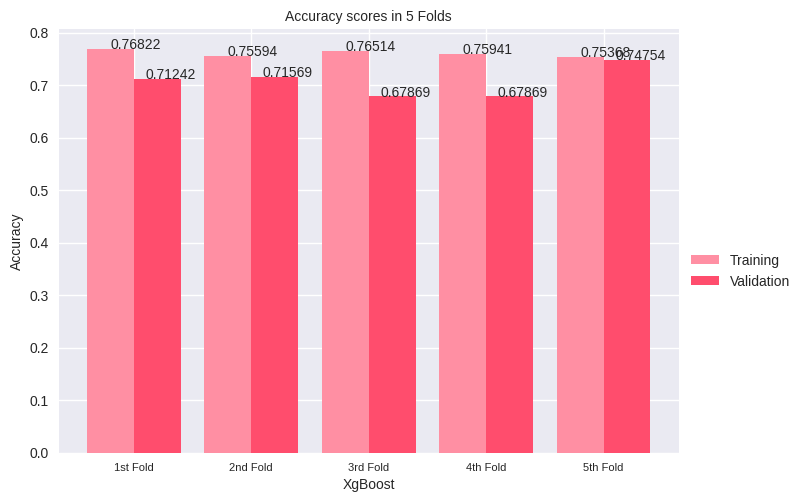

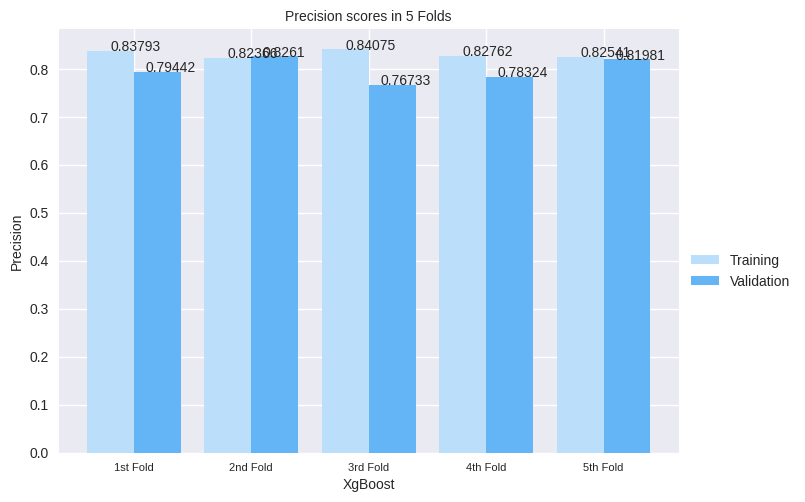

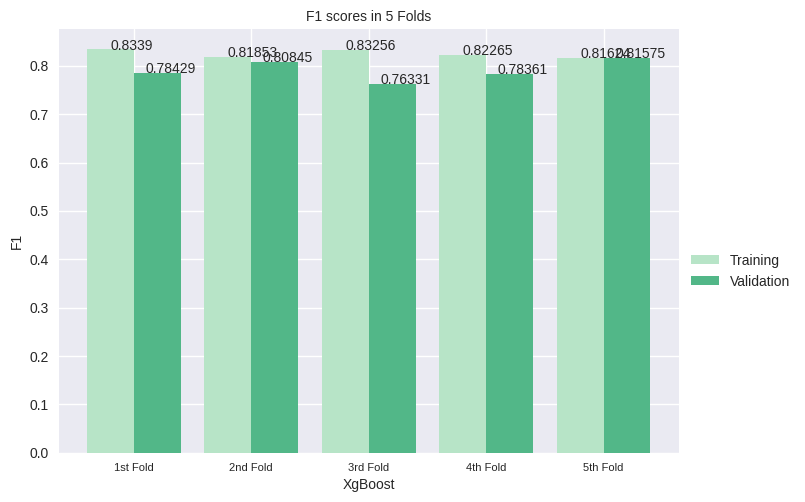

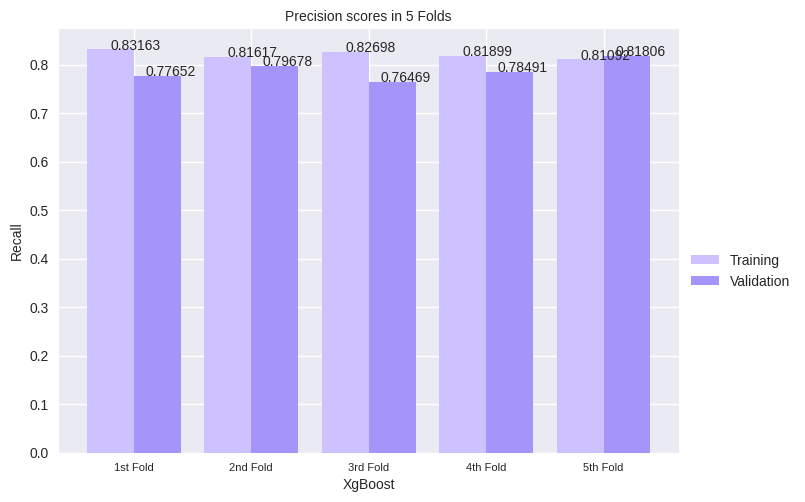

In [ ]:
model_name = "XgBoost"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

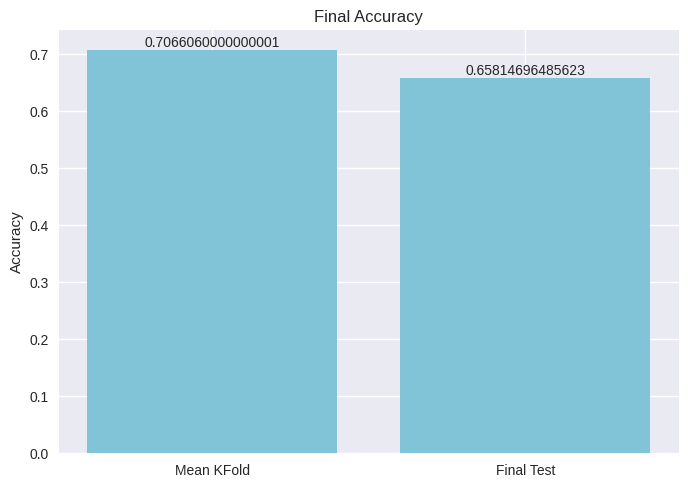

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = modelXGB.predict(X_test)
xgbScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), xgbScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
display(X)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat
0,-8.100000,5.100000,-3.100000,85.000000,-5.264546,5.300000,1.300000,1006.700000,0.0,1,1,1,28.100000,2
1,-12.200000,6.500000,-8.200000,79.300000,-11.148565,7.000000,5.700000,1003.300000,1.2,1,2,2,31.400000,2
2,-11.200000,2.000000,-7.800000,74.500000,-11.542363,9.900000,7.300000,1008.300000,0.0,1,3,3,27.700000,2
3,-14.600000,5.600000,-10.800000,67.500000,-15.645621,8.800000,0.700000,1004.000000,0.0,1,4,4,31.400000,2
4,-13.200000,11.900000,-4.200000,90.500000,-5.521952,5.900000,5.700000,992.900000,0.4,1,5,5,31.700000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-25.013590,9.331768,-15.328597,81.563501,-18.906306,1.113661,2.331910,1002.254216,0.0,1,9,2,111.590893,5
1836,-24.041602,8.628525,-16.958685,76.503269,-22.779133,1.806539,6.344871,988.491091,0.0,1,17,2,120.995505,5
1837,-3.974885,3.322750,-1.710665,90.900473,-2.999844,3.056872,0.000000,984.146213,0.0,1,13,3,111.606635,5
1838,-24.785070,9.087488,-15.545981,80.901582,-19.433409,1.231860,2.781070,1000.646698,0.0,1,10,2,111.512093,5


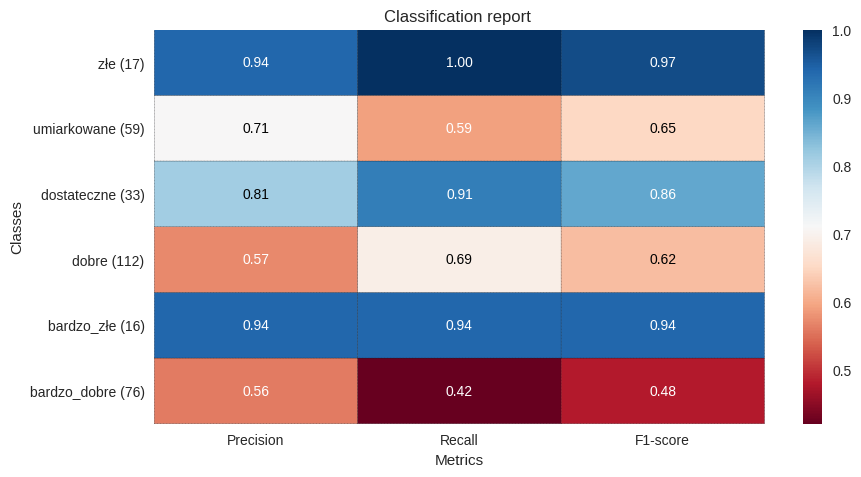

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

## Confussion Matrix

In [ ]:
display(X)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat
0,-8.100000,5.100000,-3.100000,85.000000,5.300000,1.300000,1006.700000,0.0,1,1,1,28.100000,2
1,-12.200000,6.500000,-8.200000,79.300000,7.000000,5.700000,1003.300000,1.2,1,2,2,31.400000,2
2,-11.200000,2.000000,-7.800000,74.500000,9.900000,7.300000,1008.300000,0.0,1,3,3,27.700000,2
3,-14.600000,5.600000,-10.800000,67.500000,8.800000,0.700000,1004.000000,0.0,1,4,4,31.400000,2
4,-13.200000,11.900000,-4.200000,90.500000,5.900000,5.700000,992.900000,0.4,1,5,5,31.700000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-25.013590,9.331768,-15.328597,81.563501,1.113661,2.331910,1002.254216,0.0,1,9,2,111.590893,5
1836,-24.041602,8.628525,-16.958685,76.503269,1.806539,6.344871,988.491091,0.0,1,17,2,120.995505,5
1837,-3.974885,3.322750,-1.710665,90.900473,3.056872,0.000000,984.146213,0.0,1,13,3,111.606635,5
1838,-24.785070,9.087488,-15.545981,80.901582,1.231860,2.781070,1000.646698,0.0,1,10,2,111.512093,5


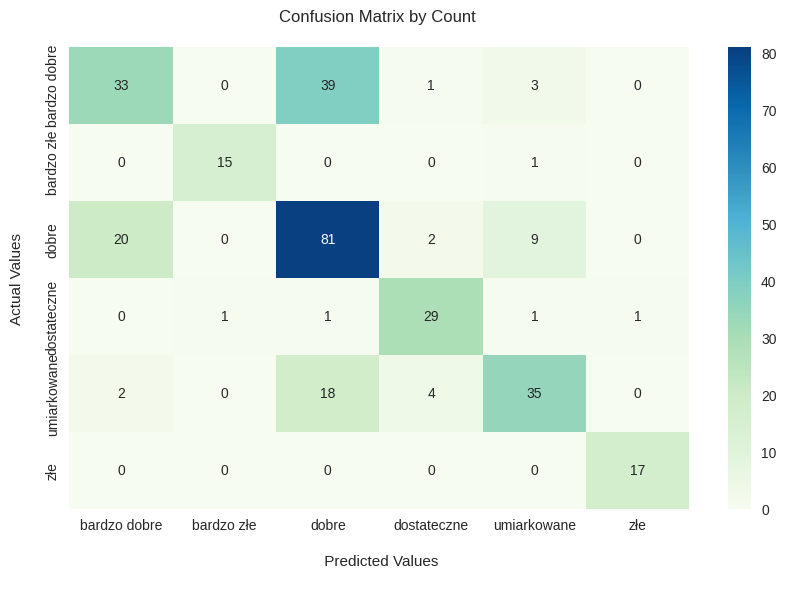

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = modelXGB.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

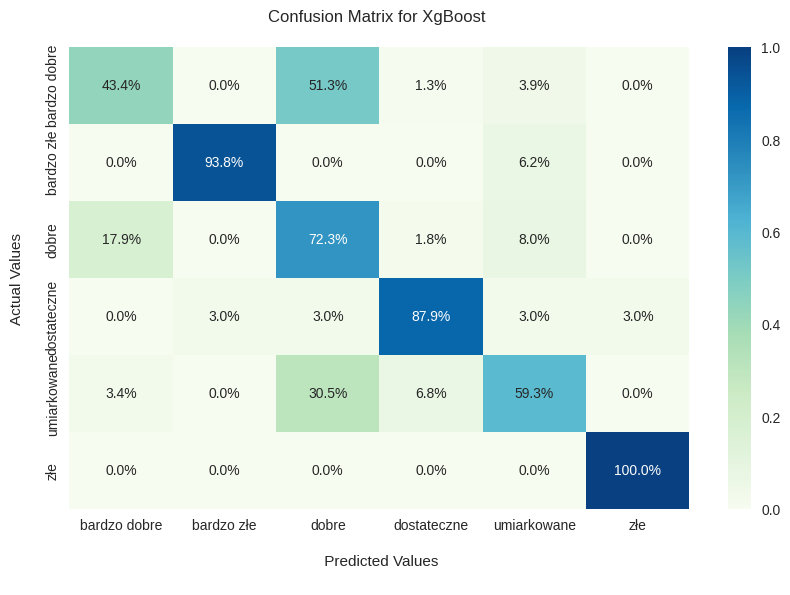

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = modelXGB.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix for XgBoost \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Funkcja generująca losowe dane w określonych przedziałach
def generate_data(num_samples):
    np.random.seed(42)  # Ustawienie ziarna dla powtarzalności wyników

    data = []
    for _ in range(num_samples):
        temp_min = np.random.uniform(-10, -5)  # Temperatura minimalna przy gruncie [°C]
        temp_diff = np.random.uniform(3, 5)  # Różnica Maksymalnej i Minimalnej temperatury [°C]
        temp_avg = temp_min + temp_diff / 2  # Średnia temperatura dobowa [°C]
        humidity = np.random.uniform(85, 95)  # Średnia dobowa wilgotność względna [%]
        dew_point = temp_min - np.random.uniform(0, 2)  # Temperatura punktu Rosy [°C]
        wind_speed = np.random.uniform(2, 5)  # Średnia dobowa prędkość wiatru [m/s]
        cloud_cover = np.random.uniform(6, 8)  # Średnie dobowe zachmurzenie ogólne [oktanty]
        pressure = np.random.uniform(1010, 1020)  # Średnia dobowe ciśnienie na poziomie stacji [hPa]
        rainfall = np.random.uniform(0, 5)  # Suma opadu dzień [mm]
        location = np.random.randint(1, 13)  # Lokalizacja (numer)
        day_of_year = np.random.randint(32, 60)  # Dzień Roku (luty)
        day_of_week = np.random.randint(0, 7)  # Dzień Tygodnia (0-6, zakładam 0 = niedziela)
        pm10 = np.random.uniform(0, 200)  # PM10 (wartość)

        # Przypisanie kategorii PM10
        if pm10 <= 20:
            pm10cat = 0
        elif pm10 <= 50:
            pm10cat = 2
        elif pm10 <= 80:
            pm10cat = 4
        elif pm10 <= 110:
            pm10cat = 3
        elif pm10 <= 150:
            pm10cat = 5
        else:
            pm10cat = 1

        data.append([temp_min, temp_diff, temp_avg, humidity, dew_point, wind_speed, cloud_cover, pressure, rainfall, location, day_of_year, day_of_week, pm10, pm10cat])

    return np.array(data)

# Generowanie 15 przykładów
new_data_samples = generate_data(15)

In [ ]:
display(new_data_samples)

array([[-8.12729941e+00,  4.90142861e+00, -5.67658510e+00,
         9.23199394e+01, -9.32461637e+00,  2.46805592e+00,
         6.31198904e+00,  1.01058084e+03,  4.33088073e+00,
         4.00000000e+00,  3.90000000e+01,  2.00000000e+00,
         4.11689886e+00,  0.00000000e+00],
       [-5.15045074e+00,  4.66488528e+00, -2.81800810e+00,
         8.71233911e+01, -5.51410067e+00,  2.55021353e+00,
         6.60848449e+00,  1.01524756e+03,  2.15972509e+00,
         1.00000000e+00,  5.80000000e+01,  2.00000000e+00,
         7.99721943e+01,  4.00000000e+00],
       [-9.76667168e+00,  4.94751104e+00, -7.29291617e+00,
         8.73277134e+01, -9.94788455e+00,  3.85515803e+00,
         6.76492398e+00,  1.01983231e+03,  2.33381447e+00,
         5.00000000e+00,  5.00000000e+01,  6.00000000e+00,
         3.41048247e+01,  2.00000000e+00],
       [-9.67474204e+00,  4.89777107e+00, -7.22585650e+00,
         9.46563203e+01, -1.12915367e+01,  2.91384131e+00,
         6.19534423e+00,  1.01684233e+03,  2.

In [ ]:
new_data = np.array([[-8, 4, -5, 90, -6, 3.5, 7, 1015.4, 2.0, 1, 40, 3, 20.5, 2]])

# Przewidywanie klasy dla nowego wiersza danych
prediction = modelXGB.predict(new_data)

# Wypisywanie przewidywanej klasy
print("Przewidywana klasa dla nowego wiersza danych:", prediction)

ValueError: Feature shape mismatch, expected: 13, got 14

# **WEIGHTED_L2**

In [ ]:
pip install catboost

In [ ]:
X_pre_train, X_pre_test, y_pre_train, y_pre_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

def get_models():
 models = list()
 models.append(('lightgbm', lgb.LGBMClassifier()))
 models.append(('cb', CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')))
 models.append(('xgbost', xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
)))
 return models

In [ ]:
def evaluate_models(models, X_pre_train, X_pre_test, y_pre_train, y_pre_test):
 # fit and evaluate the models
 scores = list()
 for name, model in models:
 # fit the model
   model.fit(X_train, y_train)
 # evaluate the model
   yhat = model.predict(X_pre_test)
   acc = accuracy_score(y_pre_test, yhat)
 # store the performance
   scores.append(acc)
 # report model performance
 return scores

In [ ]:
models = get_models()
scores = evaluate_models(models, X_pre_train, X_pre_test, y_pre_train, y_pre_test)
print(scores)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 10337, number of used features: 21
[LightGBM] [Info] Start training from score -1.243806
[LightGBM] [Info] Start training from score -3.605130
[LightGBM] [Info] Start training from score -0.658073
[LightGBM] [Info] Start training from score -3.040949
[LightGBM] [Info] Start training from score -2.345780
[LightGBM] [Info] Start training from score -3.767021
0:	learn: 1.6048588	total: 73.9ms	remaining: 1m 13s
1:	learn: 1.4822715	total: 130ms	remaining: 1m 4s
2:	learn: 1.3865304	total: 188ms	remaining: 1m 2s
3:	learn: 1.3040612	total: 226ms	remaining: 56.2s
4:	learn: 1.2435327	total: 263ms	remaining: 52.3s
5:	learn: 1.1957087	total: 324ms	remaining: 53.7s
6:	learn: 1.1492110	t

## W_L2 Validation

In [ ]:
from sklearn.ensemble import VotingClassifier

# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))
# evaluate each standalone model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
for i in range(len(models)):
 print('>%s: %.3f' % (models[i][0], scores[i]*100))
# evaluate equal weighting
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Voting Accuracy: %.3f' % (score*100))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 10337, number of used features: 21
[LightGBM] [Info] Start training from score -1.243806
[LightGBM] [Info] Start training from score -3.605130
[LightGBM] [Info] Start training from score -0.658073
[LightGBM] [Info] Start training from score -3.040949
[LightGBM] [Info] Start training from score -2.345780
[LightGBM] [Info] Start training from score -3.767021
0:	learn: 1.6048588	total: 40.5ms	remaining: 40.4s
1:	learn: 1.4822715	total: 71.1ms	remaining: 35.5s
2:	learn: 1.3865304	total: 100ms	remaining: 33.3s
3:	learn: 1.3040612	total: 129ms	remaining: 32.1s
4:	learn: 1.2435327	total: 158ms	remaining: 31.5s
5:	learn: 1.1957087	total: 189ms	remaining: 31.4s
6:	learn: 1.1492110	t

## Accuracy Score

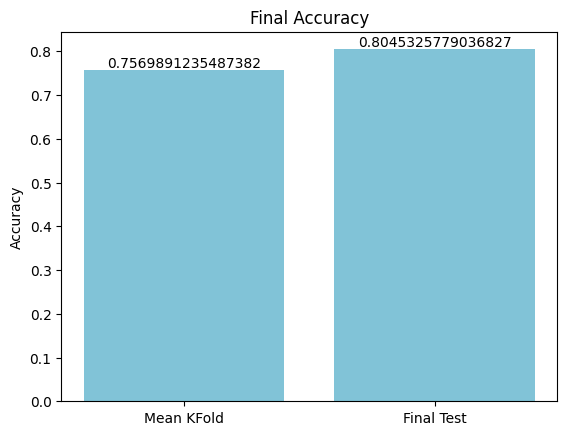

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = ensemble.predict(X_test)
score = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), score]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## Confussion Matrix

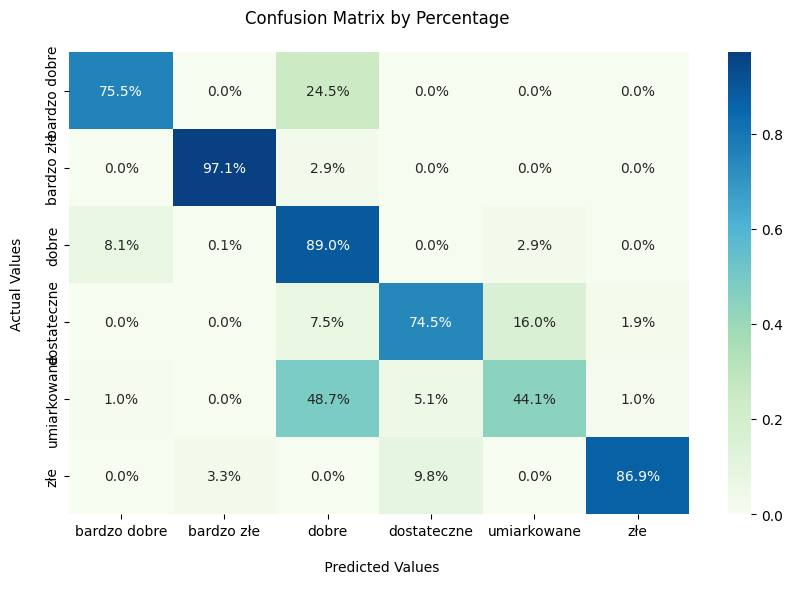

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = ensemble.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# **KNN**

## KNN validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

knn = LogisticRegression()

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    knn.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = knn.score(X_train1, y_train1)
    test_score = knn.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = knn.predict(X_train1)
    y_test1_pred = knn.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)


## Kfold visualization

In [ ]:
model_name = "KNN"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
knnScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), knnScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

## Confussion Matrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n (KNN)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n (KNN)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# **GBM**

### GBM validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

GBM = GradientBoostingClassifier()

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    GBM.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = GBM.score(X_train1, y_train1)
    test_score = GBM.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = GBM.predict(X_train1)
    y_test1_pred = GBM.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Kfold visualization

In [ ]:
model_name = "Gradient boosting classification"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = GBM.predict(X_test)
gbmScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), gbmScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

## Confussion Matrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = GBM.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n (Gradient Boosting Classifier)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = GBM.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n (Gradient Boosting Classifier)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

LightGBM

# **MLP**

## MLP validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

MLP = MLPClassifier()

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    MLP.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = MLP.score(X_train1, y_train1)
    test_score = MLP.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = MLP.predict(X_train1)
    y_test1_pred = MLP.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)


## Kfold visualization

In [ ]:
model_name = "MLP"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = MLP.predict(X_test)
MLPScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), MLPScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

NameError: name 'parse_CL' is not defined

## Confussion Matrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = MLP.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n (MLP)');
fx.set_xlabel('\n Predicted Values\n ')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n (MLP)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# **Decision Tree**

## Decision Tree validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

kf = KFold(n_splits=5,shuffle=True)

Xval = X_train

# Inicjalizacja list do przechowywania wyników dla poszczególnych foldów
fold_train_scores = []
fold_test_scores = []

train_precisions = []
test_precisions = []

train_fscores = []
test_fscores = []

train_recalls = []
test_recalls = []

dT = DecisionTreeClassifier()

# Iterowanie przez foldy
for train_index, test_index in kf.split(X_train):
    # Podział na zbiory treningowe i testowe
    X_train1, X_test1 = Xval[train_index], Xval[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]

    # Dopasowanie modelu
    dT.fit(X_train1, y_train1)

    # Obliczenie wyników dla zbiorów treningowych i testowych
    train_score = dT.score(X_train1, y_train1)
    test_score = dT.score(X_test1, y_test1)

    # Obliczanie precyzji
    y_train1_pred = dT.predict(X_train1)
    y_test1_pred = dT.predict(X_test1)

    train_precision = precision_score(y_train1, y_train1_pred,average='macro')
    test_precision = precision_score(y_test1, y_test1_pred,average='macro')

    train_fscore = f1_score(y_train1, y_train1_pred, average='macro')
    test_fscore = f1_score(y_test1, y_test1_pred, average='macro')

    train_recall = recall_score(y_train1, y_train1_pred, average='macro')
    test_recall = recall_score(y_test1, y_test1_pred, average='macro')

    # Dodanie wyników do list dla poszczególnych foldów
    fold_train_scores.append(train_score)
    fold_test_scores.append(test_score)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_fscores.append(train_fscore)
    test_fscores.append(test_fscore)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)


## Kfold visualization

In [ ]:
model_name = "Decision Tree"

plot1 = plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            roundList(fold_train_scores),
            roundList(fold_test_scores))

plot2 = plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            roundList(train_precisions),
            roundList(test_precisions))

plot3 = plot_result(model_name,
            "F1",
            "F1 scores in 5 Folds",
            roundList(train_fscores),
            roundList(test_fscores))

plot4 = plot_result(model_name,
            "Recall",
            "Precision scores in 5 Folds",
            roundList(train_recalls),
            roundList(test_recalls))

## Accuracy Final

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = dT.predict(X_test)
dTScore = accuracy_score(y_test,pred)


categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [np.mean(fold_test_scores), dTScore]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

NameError: name 'dT' is not defined

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

## Confussion Matrix

In [ ]:
#Ilościowy
from sklearn.metrics import confusion_matrix
pred = dT.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)

fx=sns.heatmap(cm, annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix by Count \n (Decision Tree)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = dT.predict(X_test)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n (Decision Tree)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

# Autogluon

In [ ]:
!pip install -q autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 877.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
pip install h2o


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
pip install -U scikit-learn

In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.1.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.4.1.post1


In [ ]:
display(X_train)

array([[22.5, 13.3, 12.5, ..., 11.7, 19.0, 0],
       [28.5, 18.8, 15.2, ..., 77.7, 24.67, 2],
       [25.9, 11.9, 8.5, ..., 20.6, 15.0, 0],
       ...,
       [8.3, 3.5, -2.9, ..., 6.7, 45.9, 2],
       [1.0, -7.3, -8.4, ..., 51.2, 29.75, 2],
       [22.0, 14.5, 13.0, ..., 32.9, 20.14, 2]], dtype=object)

In [ ]:
df_test = pd.DataFrame(X_train, columns = ['Maksymalna temperatura dobowa [°C]','Minimalna temperatura dobowa [°C]','Temperatura minimalna przy gruncie [°C]','Róznica Maksymalnej i Minimalnej temperatury [°C]','Suma dobowa opadów [mm]','Rodzaj opadu  [S/W/ ]','Wysokość pokrywy śnieżnej [cm]','Średnia temperatura dobowa [°C]','Średnia dobowa wilgotność względna [%]','Temperatura punktu Rosy [°C]','Średnia dobowa prędkość wiatru [m/s]','Średnie dobowe zachmurzenie ogólne [oktanty]','Średnia dobowe ciśnienie na poziomie stacji [hPa]','Suma opadu dzień  [mm]','Location','Dzień Roku','Dzień Tygodnia',"PM2.5","O3",pm,pm24])

In [ ]:
reArr = ['Maksymalna temperatura dobowa [°C]','Minimalna temperatura dobowa [°C]','Temperatura minimalna przy gruncie [°C]','Róznica Maksymalnej i Minimalnej temperatury [°C]','Suma dobowa opadów [mm]','Rodzaj opadu  [S/W/ ]','Wysokość pokrywy śnieżnej [cm]','Średnia temperatura dobowa [°C]','Średnia dobowa wilgotność względna [%]','Średnia dobowa prędkość wiatru [m/s]','Średnie dobowe zachmurzenie ogólne [oktanty]','Średnia dobowe ciśnienie na poziomie stacji [hPa]','Suma opadu dzień  [mm]','Location','Dzień Roku','Dzień Tygodnia',"PM2.5","O3",pm,pm24]
df_df_pm10=df_df_pm10[reArr]

In [ ]:
display(df_test)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],...,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24
0,22.5,13.3,12.5,9.2,6.6,1.0,0,16.2,88.5,14.297371,...,0.0,1000.9,0.0,3,141,3,11.1,11.7,19.0,0
1,28.5,18.8,15.2,9.7,0.0,1.0,0,23.5,62.1,15.825956,...,3.0,997.2,0.2,12,141,2,7.08,77.7,24.67,2
2,25.9,11.9,8.5,14.0,0.0,0.0,0,17.8,67.8,11.770296,...,3.0,996.3,4.4,2,193,3,19.5,20.6,15.0,0
3,25.3,17.3,15.5,8.0,0.1,1.0,0,20.8,68.6,14.814387,...,8.0,1008.7,1.2,8,215,1,12.16,8.2,20.69,2
4,11.6,3.5,3.8,8.1,0.0,0.0,0,7.4,78.1,3.832345,...,1.0,1006.0,0.0,9,116,4,19.41,38.77,31.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,20.2,11.6,8.9,8.6,0.0,1.0,0,16.0,73.0,11.162168,...,8.0,999.0,0.0,11,189,3,20.383,3.3,10.7,0
10333,21.993218,7.552133,3.893218,14.441085,0.0,0.0,0,12.932947,73.682367,8.339204,...,4.732947,1006.223058,0.0,8,280,3,14.97911,3.705524,67.827201,4
10334,8.3,3.5,-2.9,4.8,0.0,0.0,0,5.1,77.9,1.561297,...,3.7,993.8,1.8,12,16,6,20.692,6.7,45.9,2
10335,1.0,-7.3,-8.4,8.3,0.0,0.0,0,-3.5,57.6,-10.6683,...,7.0,1015.0,0.0,11,48,3,2.54,51.2,29.75,2


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor



df_test["PM10+24cat"] = y_train

# Utwórz obiekt TabularDataset z połączonymi danymi
dataset = TabularDataset(df_test)

# Określ nazwę kolumny zawierającej etykiety (target)
label_column = 'PM10+24cat'  # Zastąp nazwą rzeczywistej kolumny z etykietami

# Utwórz obiekt predictor AutoGluon
predictor = TabularPredictor(label=label_column)

# Dopasuj model
predictor.fit(dataset)


ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20240319_133524")

## Confussion Matrix

In [ ]:
display(y)

array([4, 2, 4, ..., 0, 2, 4])

In [ ]:
display(X)

array([[  0.38305709,   0.39914163,   0.31379962, ...,   4.        ,
         45.        ,   2.        ],
       [  0.5985267 ,   0.31330472,   0.51417769, ...,   4.        ,
         11.97      ,   0.        ],
       [  0.70349908,   0.40343348,   0.6294896 , ...,   5.        ,
        114.31      ,   5.        ],
       ...,
       [  0.76427256,   0.15021459,   0.68620038, ...,   1.        ,
         34.83      ,   2.        ],
       [  0.7053407 ,   0.38197425,   0.64650284, ...,   6.        ,
         20.        ,   0.        ],
       [  0.5174954 ,   0.30042918,   0.46691871, ...,   7.        ,
         16.5       ,   0.        ]])

In [ ]:
df_numpy_to_pandas = pd.DataFrame(X_test, columns = ['Temperatura minimalna przy gruncie [°C]','Róznica Maksymalnej i Minimalnej temperatury [°C]','Średnia temperatura dobowa [°C]','Średnia dobowa wilgotność względna [%]','Średnia dobowa prędkość wiatru [m/s]','Średnie dobowe zachmurzenie ogólne [oktanty]','Średnia dobowe ciśnienie na poziomie stacji [hPa]','Suma opadu dzień  [mm]','Location','Dzień Roku','Dzień Tygodnia',pm,pmcat] )

In [ ]:
display(df_numpy_to_pandas)

,Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM10,PM10cat
0,0.383057,0.399142,0.313800,0.738,0.036842,0.2875,0.534682,0.0,2.0,42.0,4.0,45.00,2.0
1,0.598527,0.313305,0.514178,0.778,0.052632,0.1250,0.578035,0.0,9.0,108.0,4.0,11.97,0.0
2,0.703499,0.403433,0.629490,0.000,0.000000,1.0000,0.635838,0.0,10.0,87.0,5.0,114.31,5.0
3,0.609576,0.154506,0.529301,0.000,0.000000,0.1250,0.346821,0.0,4.0,336.0,1.0,11.50,0.0
4,0.683241,0.424893,0.644612,0.000,0.142105,0.1250,0.296243,1.4,6.0,301.0,3.0,31.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,0.572744,0.072961,0.431002,0.628,0.052632,0.0000,0.052023,5.8,1.0,345.0,7.0,31.00,2.0
7156,0.904236,0.377682,0.824197,0.000,0.000000,0.5000,0.536127,0.0,10.0,201.0,7.0,47.36,2.0
7157,0.764273,0.150215,0.686200,0.000,0.000000,0.7500,0.632948,0.0,12.0,301.0,1.0,34.83,2.0
7158,0.705341,0.381974,0.646503,0.685,0.121053,0.2125,0.458092,0.0,3.0,142.0,6.0,20.00,0.0


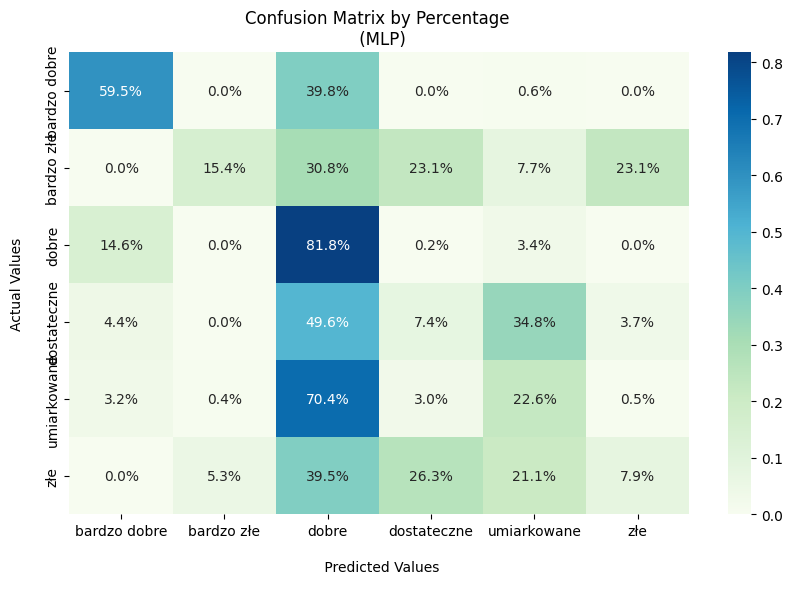

In [ ]:
#Procentowy
from sklearn.metrics import confusion_matrix
pred = predictor.predict(df_numpy_to_pandas)

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, pred)
# Percent
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fx=sns.heatmap(cmn, annot=True, fmt=".1%",cmap="GnBu")
fx.set_title('Confusion Matrix by Percentage \n (MLP)');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(le_name_mapping)
fx.yaxis.set_ticklabels(le_name_mapping)
plt.show()

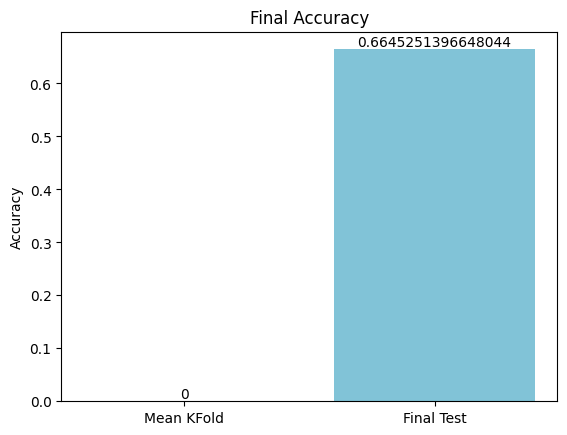

In [ ]:
#wynik dla odłożonego na początku zbioru testowego, który nie zawierał się w 5 foldach treningowych
from sklearn.metrics import accuracy_score
pred = predictor.predict(df_numpy_to_pandas)
scoree = accuracy_score(y_test,pred)

categories = ['Mean KFold', 'Final Test']  # Kategorie
values = [0, scoree]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#81c3d7")
plt.ylabel('Accuracy')
plt.title('Final Accuracy')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

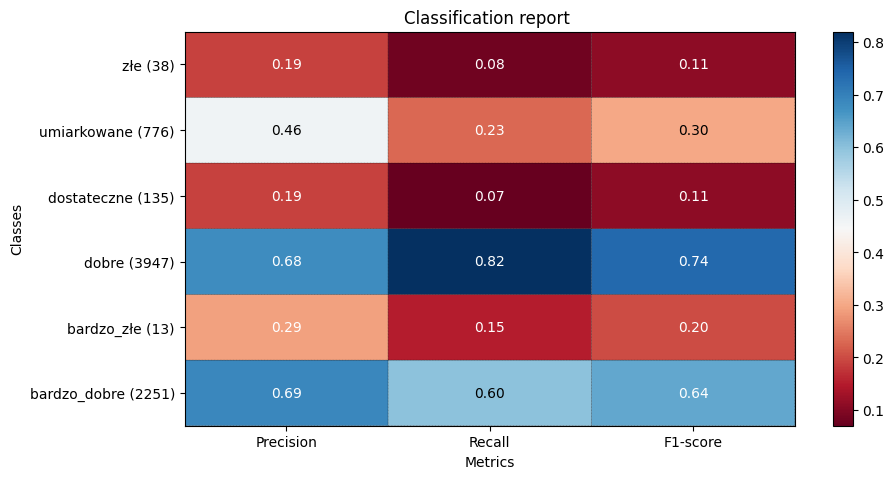

In [ ]:
from sklearn.metrics import classification_report
cl = parse_CL(classification_report(y_test, pred))
plot_classification_report(cl)

# LSTM

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AirPolution/PrzygotowaneDane/Final_oversampled(SmoteTomek).csv')

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
display(df)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],...,Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10,PM10+24,PM10cat,PM10+24cat
0,0.700000,-4.400000,-8.100000,5.100000,0.000000,0.000000,2,-3.100000,85.000000,-5.264546,...,0.000000,1,1,1,80.500000,25.000000,28.100000,31.400000,dobre,dobre
1,-4.300000,-10.800000,-12.200000,6.500000,0.000000,0.000000,2,-8.200000,79.300000,-11.148565,...,1.200000,1,2,2,50.400000,47.000000,31.400000,27.700000,dobre,dobre
2,-6.300000,-8.300000,-11.200000,2.000000,0.000000,0.000000,1,-7.800000,74.500000,-11.542363,...,0.000000,1,3,3,41.300000,48.000000,27.700000,31.400000,dobre,dobre
3,-6.700000,-12.300000,-14.600000,5.600000,0.000000,0.000000,1,-10.800000,67.500000,-15.645621,...,0.000000,1,4,4,20.300000,45.000000,31.400000,31.700000,dobre,dobre
4,-0.400000,-12.300000,-13.200000,11.900000,4.200000,2.000000,0,-4.200000,90.500000,-5.521952,...,0.400000,1,5,5,11.200000,4.000000,31.700000,49.100000,dobre,dobre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,16.159115,5.878536,2.752130,10.280580,0.063203,0.090290,0,10.887565,79.711754,7.515089,...,0.000000,1,100,2,21.389641,23.033899,54.347870,51.577372,umiarkowane,umiarkowane
12454,14.572968,3.344754,-0.171715,11.228214,0.000000,0.000000,0,8.242391,75.934192,4.244517,...,0.000000,2,268,2,21.578081,6.823488,51.577372,58.578321,umiarkowane,umiarkowane
12455,-7.249444,-11.922762,-12.306419,4.673319,2.291311,1.632686,14,-9.955449,82.986792,-12.295448,...,0.434492,4,20,4,23.993220,34.990813,58.578321,70.049867,umiarkowane,umiarkowane
12456,-3.892800,-14.634356,-18.062889,10.741556,1.605170,2.000000,35,-8.709422,73.554844,-12.575727,...,0.650785,4,191,2,15.478474,14.473955,70.049867,77.782689,umiarkowane,umiarkowane


In [ ]:
df = df.drop('PM10+24',axis=1)
df = df.drop('PM10cat',axis=1)
df = df.drop('PM10+24cat',axis=1)

In [ ]:
print(df.columns)

Index(['Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]',
       'Róznica Maksymalnej i Minimalnej temperatury [°C]',
       'Suma dobowa opadów [mm]', 'Rodzaj opadu  [S/W/ ]',
       'Wysokość pokrywy śnieżnej [cm]', 'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Temperatura punktu Rosy [°C]', 'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]', 'Location', 'Dzień Roku', 'Dzień Tygodnia',
       'PM2.5', 'O3', 'PM10'],
      dtype='object')


In [ ]:
window_size = 30
target = df.columns.get_loc('PM10')

In [ ]:
def prepare_model_datasets(data, window, target):
    X = []
    Y = []
    for i in range(window, len(data)):
            X.append(data[i - window:i, 0:data.shape[1]])
            Y.append(data[i, target])
    return np.array(X),np.array(Y)

In [ ]:
X = df.drop('PM10',axis=1)
y = df['PM10']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X.values,y,
                                   random_state=23,
                                   test_size=0.17,
                                   shuffle=True)

In [ ]:
df_train = pd.DataFrame(X_train, columns = ['Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]',
       'Róznica Maksymalnej i Minimalnej temperatury [°C]',
       'Suma dobowa opadów [mm]', 'Rodzaj opadu  [S/W/ ]',
       'Wysokość pokrywy śnieżnej [cm]', 'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Temperatura punktu Rosy [°C]', 'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]', 'Location', 'Dzień Roku', 'Dzień Tygodnia',
       'PM2.5', 'O3'])


y_train_pd = pd.DataFrame(y_train,columns = ['PM10'])
y_train_pd = y_train_pd.reset_index()

df_train['PM10'] = y_train_pd['PM10']

In [ ]:
df_train.isna().sum()

Maksymalna temperatura dobowa [°C]                   0
Minimalna temperatura dobowa [°C]                    0
Temperatura minimalna przy gruncie [°C]              0
Róznica Maksymalnej i Minimalnej temperatury [°C]    0
Suma dobowa opadów [mm]                              0
Rodzaj opadu  [S/W/ ]                                0
Wysokość pokrywy śnieżnej [cm]                       0
Średnia temperatura dobowa [°C]                      0
Średnia dobowa wilgotność względna [%]               0
Temperatura punktu Rosy [°C]                         0
Średnia dobowa prędkość wiatru [m/s]                 0
Średnie dobowe zachmurzenie ogólne [oktanty]         0
Średnia dobowe ciśnienie na poziomie stacji [hPa]    0
Suma opadu dzień  [mm]                               0
Location                                             0
Dzień Roku                                           0
Dzień Tygodnia                                       0
PM2.5                                                0
O3        

In [ ]:
df_test = pd.DataFrame(X_test, columns = ['Maksymalna temperatura dobowa [°C]',
       'Minimalna temperatura dobowa [°C]',
       'Temperatura minimalna przy gruncie [°C]',
       'Róznica Maksymalnej i Minimalnej temperatury [°C]',
       'Suma dobowa opadów [mm]', 'Rodzaj opadu  [S/W/ ]',
       'Wysokość pokrywy śnieżnej [cm]', 'Średnia temperatura dobowa [°C]',
       'Średnia dobowa wilgotność względna [%]',
       'Temperatura punktu Rosy [°C]', 'Średnia dobowa prędkość wiatru [m/s]',
       'Średnie dobowe zachmurzenie ogólne [oktanty]',
       'Średnia dobowe ciśnienie na poziomie stacji [hPa]',
       'Suma opadu dzień  [mm]', 'Location', 'Dzień Roku', 'Dzień Tygodnia',
       'PM2.5', 'O3'])

y_test_pd = pd.DataFrame(y_test,columns = ['PM10'])
y_test_pd = y_test_pd.reset_index()

df_test['PM10'] = y_test_pd['PM10']

In [ ]:
display(df_test)

,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Róznica Maksymalnej i Minimalnej temperatury [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Średnia temperatura dobowa [°C],Średnia dobowa wilgotność względna [%],Temperatura punktu Rosy [°C],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Location,Dzień Roku,Dzień Tygodnia,PM2.5,O3,PM10
0,15.000000,5.800000,5.500000,9.200000,0.000000,0.00000,0.0,9.900000,71.800000,5.046923,5.400000,1.000000,1006.600000,0.0,5.0,86.0,2.0,16.000000,38.000000,25.000000
1,1.502094,-1.833566,-3.595114,3.335660,0.570622,1.33566,0.0,0.166434,94.702792,-0.583045,3.365736,5.751078,1017.318847,0.0,9.0,332.0,4.0,7.204316,20.830179,44.654598
2,8.600000,3.600000,4.600000,5.000000,0.000000,0.00000,0.0,5.500000,92.400000,4.365347,1.800000,0.700000,1004.900000,0.0,12.0,326.0,1.0,14.986000,11.100000,17.444000
3,3.443101,-5.177001,-8.912435,8.620102,0.604941,0.09029,2.0,-1.539522,77.616868,-4.952173,3.755536,7.090290,995.151622,0.0,9.0,29.0,5.0,8.815437,36.726044,111.481584
4,27.800000,14.700000,10.700000,13.100000,0.000000,0.00000,0.0,22.200000,53.900000,12.423631,4.900000,8.000000,1000.400000,21.5,8.0,142.0,4.0,18.140000,77.200000,28.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,18.800000,9.400000,9.200000,9.400000,7.900000,1.00000,0.0,13.200000,85.300000,10.785866,2.900000,3.700000,975.200000,0.7,12.0,251.0,7.0,6.710000,39.400000,15.970000
2114,29.500000,13.300000,11.600000,16.200000,0.000000,0.00000,0.0,22.000000,62.400000,14.485449,2.300000,8.000000,1007.300000,0.0,8.0,220.0,3.0,9.430000,66.670000,18.870000
2115,13.400000,4.300000,-0.900000,9.100000,0.000000,0.00000,0.0,8.100000,84.800000,5.695632,2.500000,2.300000,989.000000,0.0,11.0,309.0,5.0,16.100000,22.500000,33.930000
2116,28.400000,11.500000,9.100000,16.900000,0.100000,1.00000,0.0,20.700000,53.400000,10.891510,3.900000,6.300000,1001.900000,0.0,8.0,128.0,2.0,15.240000,39.500000,48.090000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
df_train_scaled = mms.fit_transform(df_train)

In [ ]:
df_test_scaled = mms.fit_transform(df_test)

In [ ]:
display(df_train_scaled)

array([[0.52075472, 0.63505155, 0.68619247, ..., 0.08844377, 0.49596774,
        0.0758547 ],
       [0.78618626, 0.77661988, 0.80295448, ..., 0.09537599, 0.54637097,
        0.10567859],
       [0.6701096 , 0.77178592, 0.79605671, ..., 0.03342455, 0.26851461,
        0.1142724 ],
       ...,
       [0.4754717 , 0.50103093, 0.44351464, ..., 0.16967842, 0.17170699,
        0.1667735 ],
       [0.4490566 , 0.48247423, 0.45606695, ..., 0.04740332, 0.29603495,
        0.13675214],
       [0.62264151, 0.74845361, 0.75732218, ..., 0.05204821, 0.29267473,
        0.11057692]])

In [ ]:
X_train_lstm, y_train_lstm = prepare_model_datasets(df_train_scaled, window_size, 19)
X_test_lstm, y_test_lstm = prepare_model_datasets(df_test_scaled, window_size, 19)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#budowanie modelu
def build_model(optimizer='adam', units=50):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(window_size, 20)))
    model.add(Dropout(0.3))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units = 1))

    model.compile(loss = 'mse',optimizer = optimizer)
    return model

In [ ]:
model= build_model(optimizer='adam')
learn = model.fit(X_train_lstm,y_train_lstm, epochs=20, batch_size=32,verbose=2)

Epoch 1/20
323/323 - 15s - loss: 0.0330 - 15s/epoch - 45ms/step
Epoch 2/20
323/323 - 10s - loss: 0.0314 - 10s/epoch - 31ms/step
Epoch 3/20
323/323 - 10s - loss: 0.0310 - 10s/epoch - 30ms/step
Epoch 4/20
323/323 - 11s - loss: 0.0310 - 11s/epoch - 34ms/step
Epoch 5/20
323/323 - 11s - loss: 0.0310 - 11s/epoch - 34ms/step
Epoch 6/20
323/323 - 10s - loss: 0.0310 - 10s/epoch - 31ms/step
Epoch 7/20
323/323 - 10s - loss: 0.0308 - 10s/epoch - 31ms/step
Epoch 8/20
323/323 - 11s - loss: 0.0308 - 11s/epoch - 34ms/step
Epoch 9/20
323/323 - 11s - loss: 0.0307 - 11s/epoch - 34ms/step
Epoch 10/20
323/323 - 10s - loss: 0.0307 - 10s/epoch - 32ms/step
Epoch 11/20
323/323 - 10s - loss: 0.0308 - 10s/epoch - 31ms/step
Epoch 12/20
323/323 - 11s - loss: 0.0307 - 11s/epoch - 34ms/step
Epoch 13/20
323/323 - 11s - loss: 0.0307 - 11s/epoch - 34ms/step
Epoch 14/20
323/323 - 11s - loss: 0.0307 - 11s/epoch - 33ms/step
Epoch 15/20
323/323 - 10s - loss: 0.0307 - 10s/epoch - 30ms/step
Epoch 16/20
323/323 - 11s - loss: 

In [ ]:
predicted_val = model.predict(X_test_lstm)

66/66 [==============================] - 2s 16ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_lstm, predicted_val)

rmse = np.sqrt(mse)
rmse

0.1731853958936962

In [ ]:
predictions_model_2_copies = np.repeat(predicted_val, 20, axis=-1)

In [ ]:
original_values = np.repeat(y_test_lstm, 20, axis=-1)

In [ ]:
original_val_2= mms.inverse_transform(np.reshape(original_values, (len(y_test_lstm), 20)))[:,19]

In [ ]:
predicted_val_2= mms.inverse_transform(np.reshape(predictions_model_2_copies, (len(predictions_model_2_copies), 20)))[:,19]

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(original_val_2, predicted_val_2)

rmse = np.sqrt(mse)
rmse

32.581124802039625

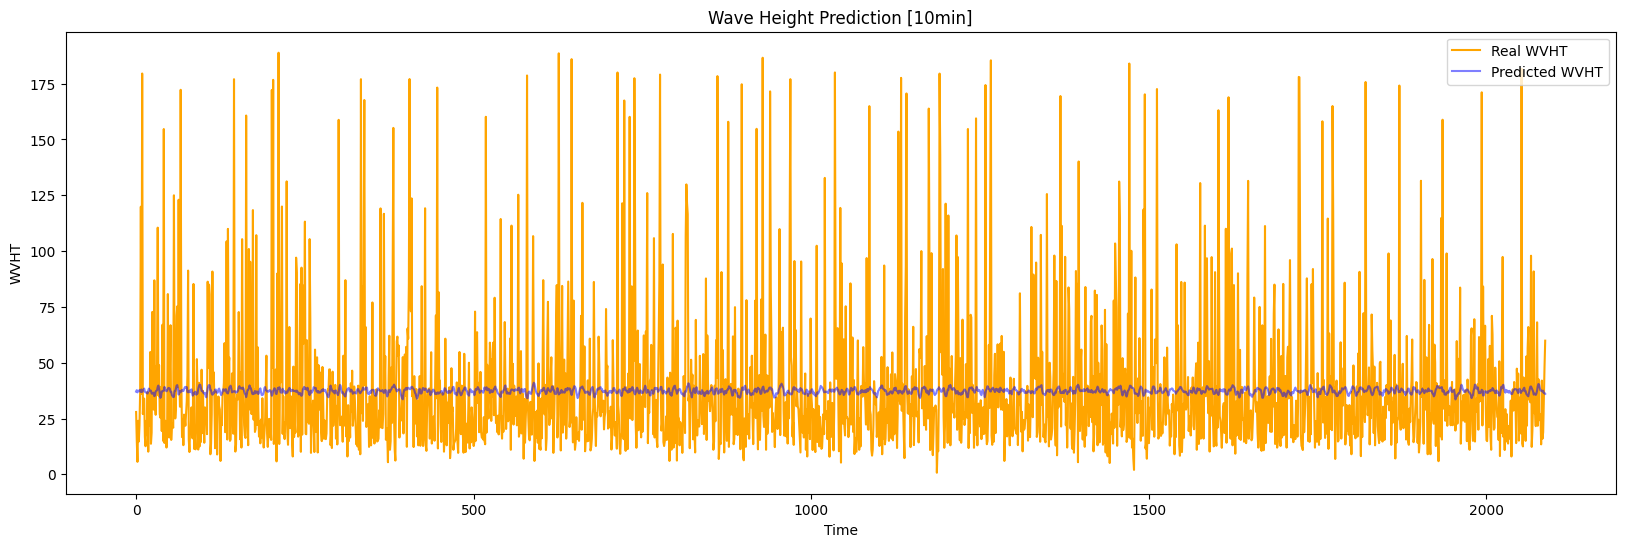

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(original_val_2, color = 'orange', label = 'Real WVHT')
plt.plot(predicted_val_2, color = 'blue',alpha=0.5, label = 'Predicted WVHT')
plt.title('Wave Height Prediction [10min]')
plt.xlabel('Time')
plt.ylabel('WVHT')
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(original_val_2, predicted_val_2)
print('MAPE', mape)

MAPE 80.32600863236497


# ▶ P r e d i c t i o n    T i m e

In [ ]:
#find the labels of the numeric encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['PM10+24cat'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

In [ ]:
print(modelXGB)

In [ ]:
import time




input_data = (15.0, 3.4, 1.0, 25.0, 83.0, 1.77, 2.66, 966.2, 0.20, 6, 84, 5,34.800000,2)


# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


start_time = time.time()
prediction = modelTree.predict(input_data_reshaped)
end_time = time.time()
execution_time = end_time - start_time
print(prediction)


In [ ]:
print(modelXGB)

In [ ]:
import time

times = []

for i in range(100):
  input_data = (15.0, 3.4, 1.0, 25.0, 83.0, 1.77, 2.66, 966.2, 0.20, 6, 84, 5,34.800000,2)


  # change the input data to a numpy array
  input_data_as_numpy_array = np.asarray(input_data)

  # reshape the numpy array as we are predicting for only on instance
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


  start_time = time.time()
  prediction = modelXGB.predict(input_data_reshaped)
  end_time = time.time()
  execution_time = end_time - start_time

  times.append(execution_time)

meanXGB = np.mean(times)


print(prediction)

In [ ]:
#wyniki czasowe dla najlepszych algorytmów
categories = ['Random Forest', 'XGBoost']  # Kategorie
values = [meanRF, meanXGB]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#e9edc9")
plt.ylabel('Time')
plt.title('Prediction Time for Best Models')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
#wyniki czasowe dla najlepszych algorytmów
categories = ['Random Forest', 'XGBoost']  # Kategorie
values = [execution_time_forest, execution_time_xgb]  # Wartości odpowiadające kategoriom

plt.bar(categories, values,color="#e9edc9")
plt.ylabel('Time')
plt.title('Prediction Time for Best Models')

for i, v in enumerate(values):
    plt.text(i, v, str(v) + " sek", ha='center', va='bottom')

plt.show()

In [ ]:
#wyniki czasowe dla najlepszych algorytmów
categories = ['Random Forest', 'XGBoost']  # Kategorie
values = [rfScore, xgbScore]  # Wartości odpowiadające kategoriom
colors = ("#b9fbc0","#ff99c8")
plt.bar(categories, values,color=colors)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Best Models')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()



```
# Sformatowano jako kod
```

# Save

In [ ]:
import pickle

pickle.dump(modelXGB, open("modelXGB(PM10)_NAJLEPSZY.sav", "wb"))